In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

logs = """
FOLD 0
--------------------------------
Starting epoch 1
Train Loss: 1.6392, Train Acc: 45.00%, Val Loss: 6.6432, Val Acc: 70.00%
Starting epoch 2
Train Loss: 1.3654, Train Acc: 57.50%, Val Loss: 4.9183, Val Acc: 50.00%
Starting epoch 3
Train Loss: 1.5111, Train Acc: 57.50%, Val Loss: 2.6562, Val Acc: 50.00%
Starting epoch 4
Train Loss: 1.7141, Train Acc: 60.00%, Val Loss: 1.9212, Val Acc: 30.00%
Starting epoch 5
Train Loss: 0.9353, Train Acc: 52.50%, Val Loss: 0.4701, Val Acc: 80.00%
Starting epoch 6
Train Loss: 1.1356, Train Acc: 47.50%, Val Loss: 0.4933, Val Acc: 70.00%
Starting epoch 7
Train Loss: 0.6907, Train Acc: 70.00%, Val Loss: 0.9504, Val Acc: 60.00%
Starting epoch 8
Train Loss: 0.6925, Train Acc: 65.00%, Val Loss: 0.7055, Val Acc: 60.00%
Starting epoch 9
Train Loss: 0.7149, Train Acc: 67.50%, Val Loss: 0.9551, Val Acc: 60.00%
Starting epoch 10
Train Loss: 0.5995, Train Acc: 77.50%, Val Loss: 0.8368, Val Acc: 60.00%
Starting epoch 11
Train Loss: 0.7980, Train Acc: 67.50%, Val Loss: 0.8053, Val Acc: 60.00%
Starting epoch 12
Train Loss: 0.4673, Train Acc: 85.00%, Val Loss: 0.8005, Val Acc: 60.00%
Starting epoch 13
Train Loss: 0.6421, Train Acc: 72.50%, Val Loss: 0.7122, Val Acc: 60.00%
Starting epoch 14
Train Loss: 0.6309, Train Acc: 72.50%, Val Loss: 0.7374, Val Acc: 60.00%
Starting epoch 15
Train Loss: 0.6384, Train Acc: 72.50%, Val Loss: 0.7016, Val Acc: 60.00%
Starting epoch 16
Train Loss: 0.7059, Train Acc: 57.50%, Val Loss: 0.7003, Val Acc: 60.00%
Starting epoch 17
Train Loss: 0.5029, Train Acc: 65.00%, Val Loss: 0.7248, Val Acc: 60.00%
Starting epoch 18
Train Loss: 0.4591, Train Acc: 82.50%, Val Loss: 0.6932, Val Acc: 70.00%
Starting epoch 19
Train Loss: 0.6376, Train Acc: 72.50%, Val Loss: 0.6875, Val Acc: 70.00%
Starting epoch 20
Train Loss: 0.7723, Train Acc: 62.50%, Val Loss: 0.6866, Val Acc: 70.00%
Starting epoch 21
Train Loss: 0.6437, Train Acc: 75.00%, Val Loss: 0.6912, Val Acc: 70.00%
Starting epoch 22
Train Loss: 0.4531, Train Acc: 77.50%, Val Loss: 0.7138, Val Acc: 60.00%
Starting epoch 23
Train Loss: 0.6104, Train Acc: 72.50%, Val Loss: 0.7573, Val Acc: 60.00%
Starting epoch 24
Train Loss: 0.6291, Train Acc: 70.00%, Val Loss: 0.7514, Val Acc: 60.00%
Starting epoch 25
Train Loss: 0.5812, Train Acc: 72.50%, Val Loss: 0.7419, Val Acc: 60.00%
Starting epoch 26
Train Loss: 0.6473, Train Acc: 77.50%, Val Loss: 0.7341, Val Acc: 60.00%
Starting epoch 27
Train Loss: 0.4316, Train Acc: 82.50%, Val Loss: 0.7140, Val Acc: 60.00%
Starting epoch 28
Train Loss: 0.5705, Train Acc: 72.50%, Val Loss: 0.7136, Val Acc: 60.00%
Starting epoch 29
Train Loss: 0.3763, Train Acc: 80.00%, Val Loss: 0.7234, Val Acc: 60.00%
Starting epoch 30
Train Loss: 0.5766, Train Acc: 72.50%, Val Loss: 0.6851, Val Acc: 70.00%
Early stopping triggered.
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Train Loss: 1.2885, Train Acc: 57.50%, Val Loss: 4.7565, Val Acc: 70.00%
Starting epoch 2
Train Loss: 1.1910, Train Acc: 67.50%, Val Loss: 1.8745, Val Acc: 90.00%
Starting epoch 3
Train Loss: 1.9083, Train Acc: 45.00%, Val Loss: 1.6067, Val Acc: 70.00%
Starting epoch 4
Train Loss: 1.0026, Train Acc: 57.50%, Val Loss: 0.5079, Val Acc: 70.00%
Starting epoch 5
Train Loss: 0.9680, Train Acc: 67.50%, Val Loss: 0.5771, Val Acc: 80.00%
Starting epoch 6
Train Loss: 0.7429, Train Acc: 67.50%, Val Loss: 0.3475, Val Acc: 80.00%
Starting epoch 7
Train Loss: 0.7006, Train Acc: 72.50%, Val Loss: 1.0760, Val Acc: 60.00%
Starting epoch 8
Train Loss: 0.5784, Train Acc: 77.50%, Val Loss: 0.9373, Val Acc: 70.00%
Starting epoch 9
Train Loss: 0.6739, Train Acc: 72.50%, Val Loss: 0.7427, Val Acc: 70.00%
Starting epoch 10
Train Loss: 0.8267, Train Acc: 57.50%, Val Loss: 2.5974, Val Acc: 30.00%
Starting epoch 11
Train Loss: 0.7340, Train Acc: 65.00%, Val Loss: 1.1603, Val Acc: 30.00%
Starting epoch 12
Train Loss: 0.6724, Train Acc: 67.50%, Val Loss: 0.5327, Val Acc: 90.00%
Starting epoch 13
Train Loss: 0.6405, Train Acc: 67.50%, Val Loss: 0.3987, Val Acc: 90.00%
Starting epoch 14
Train Loss: 0.5449, Train Acc: 80.00%, Val Loss: 0.3985, Val Acc: 90.00%
Starting epoch 15
Train Loss: 0.7653, Train Acc: 72.50%, Val Loss: 0.3935, Val Acc: 90.00%
Starting epoch 16
Train Loss: 0.5712, Train Acc: 80.00%, Val Loss: 0.3945, Val Acc: 80.00%
Starting epoch 17
Train Loss: 0.5345, Train Acc: 77.50%, Val Loss: 0.3841, Val Acc: 80.00%
Starting epoch 18
Train Loss: 0.5915, Train Acc: 65.00%, Val Loss: 0.4056, Val Acc: 80.00%
Starting epoch 19
Train Loss: 0.6671, Train Acc: 70.00%, Val Loss: 0.3981, Val Acc: 80.00%
Starting epoch 20
Train Loss: 0.6044, Train Acc: 75.00%, Val Loss: 0.4046, Val Acc: 80.00%
Starting epoch 21
Train Loss: 0.5113, Train Acc: 75.00%, Val Loss: 0.4010, Val Acc: 80.00%
Starting epoch 22
Train Loss: 0.6263, Train Acc: 70.00%, Val Loss: 0.4099, Val Acc: 80.00%
Starting epoch 23
Train Loss: 0.6124, Train Acc: 75.00%, Val Loss: 0.4125, Val Acc: 80.00%
Starting epoch 24
Train Loss: 0.5106, Train Acc: 77.50%, Val Loss: 0.4051, Val Acc: 80.00%
Starting epoch 25
Train Loss: 0.3680, Train Acc: 90.00%, Val Loss: 0.4102, Val Acc: 80.00%
Starting epoch 26
Train Loss: 0.6680, Train Acc: 62.50%, Val Loss: 0.3963, Val Acc: 90.00%
Starting epoch 27
Train Loss: 0.6760, Train Acc: 72.50%, Val Loss: 0.3803, Val Acc: 80.00%
Starting epoch 28
Train Loss: 0.6960, Train Acc: 70.00%, Val Loss: 0.3997, Val Acc: 80.00%
Starting epoch 29
Train Loss: 0.4362, Train Acc: 77.50%, Val Loss: 0.3953, Val Acc: 80.00%
Starting epoch 30
Train Loss: 0.3937, Train Acc: 72.50%, Val Loss: 0.3890, Val Acc: 90.00%
Starting epoch 31
Train Loss: 0.4568, Train Acc: 77.50%, Val Loss: 0.3917, Val Acc: 80.00%
Early stopping triggered.
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Train Loss: 1.5225, Train Acc: 47.50%, Val Loss: 4.6295, Val Acc: 70.00%
Starting epoch 2
Train Loss: 1.0351, Train Acc: 60.00%, Val Loss: 2.0230, Val Acc: 70.00%
Starting epoch 3
Train Loss: 1.2403, Train Acc: 67.50%, Val Loss: 1.4720, Val Acc: 60.00%
Starting epoch 4
Train Loss: 1.3446, Train Acc: 47.50%, Val Loss: 0.6442, Val Acc: 70.00%
Starting epoch 5
Train Loss: 1.0773, Train Acc: 65.00%, Val Loss: 0.4998, Val Acc: 70.00%
Starting epoch 6
Train Loss: 0.7123, Train Acc: 80.00%, Val Loss: 0.5734, Val Acc: 70.00%
Starting epoch 7
Train Loss: 0.4828, Train Acc: 80.00%, Val Loss: 0.7839, Val Acc: 60.00%
Starting epoch 8
Train Loss: 0.9296, Train Acc: 55.00%, Val Loss: 0.9670, Val Acc: 60.00%
Starting epoch 9
Train Loss: 0.6418, Train Acc: 72.50%, Val Loss: 1.8065, Val Acc: 30.00%
Starting epoch 10
Train Loss: 0.5273, Train Acc: 82.50%, Val Loss: 1.2695, Val Acc: 50.00%
Starting epoch 11
Train Loss: 0.5138, Train Acc: 77.50%, Val Loss: 0.9329, Val Acc: 60.00%
Starting epoch 12
Train Loss: 0.3917, Train Acc: 82.50%, Val Loss: 0.7480, Val Acc: 70.00%
Starting epoch 13
Train Loss: 0.5767, Train Acc: 82.50%, Val Loss: 0.7652, Val Acc: 60.00%
Starting epoch 14
Train Loss: 0.4298, Train Acc: 87.50%, Val Loss: 0.7098, Val Acc: 70.00%
Starting epoch 15
Train Loss: 0.4895, Train Acc: 77.50%, Val Loss: 0.6741, Val Acc: 70.00%
Starting epoch 16
Train Loss: 0.7669, Train Acc: 67.50%, Val Loss: 0.6809, Val Acc: 70.00%
Starting epoch 17
Train Loss: 0.4150, Train Acc: 82.50%, Val Loss: 0.7288, Val Acc: 70.00%
Starting epoch 18
Train Loss: 0.3459, Train Acc: 87.50%, Val Loss: 0.7451, Val Acc: 60.00%
Starting epoch 19
Train Loss: 0.4225, Train Acc: 85.00%, Val Loss: 0.7293, Val Acc: 60.00%
Starting epoch 20
Train Loss: 0.5045, Train Acc: 75.00%, Val Loss: 0.7315, Val Acc: 70.00%
Starting epoch 21
Train Loss: 0.6379, Train Acc: 70.00%, Val Loss: 0.7102, Val Acc: 70.00%
Starting epoch 22
Train Loss: 0.3087, Train Acc: 85.00%, Val Loss: 0.6909, Val Acc: 70.00%
Starting epoch 23
Train Loss: 0.6812, Train Acc: 62.50%, Val Loss: 0.6918, Val Acc: 70.00%
Starting epoch 24
Train Loss: 0.6042, Train Acc: 75.00%, Val Loss: 0.7081, Val Acc: 70.00%
Starting epoch 25
Train Loss: 0.4917, Train Acc: 82.50%, Val Loss: 0.7281, Val Acc: 70.00%
Starting epoch 26
Train Loss: 0.4526, Train Acc: 77.50%, Val Loss: 0.7285, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.4402, Train Acc: 82.50%, Val Loss: 0.7241, Val Acc: 70.00%
Starting epoch 28
Train Loss: 0.4652, Train Acc: 75.00%, Val Loss: 0.6920, Val Acc: 70.00%
Starting epoch 29
Train Loss: 0.3532, Train Acc: 82.50%, Val Loss: 0.6983, Val Acc: 70.00%
Starting epoch 30
Train Loss: 0.4336, Train Acc: 75.00%, Val Loss: 0.6952, Val Acc: 70.00%
Early stopping triggered.
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Train Loss: 1.4446, Train Acc: 57.50%, Val Loss: 15.6496, Val Acc: 70.00%
Starting epoch 2
Train Loss: 1.7664, Train Acc: 60.00%, Val Loss: 1.1199, Val Acc: 70.00%
Starting epoch 3
Train Loss: 1.2073, Train Acc: 62.50%, Val Loss: 0.4106, Val Acc: 80.00%
Starting epoch 4
Train Loss: 0.8105, Train Acc: 72.50%, Val Loss: 0.6212, Val Acc: 80.00%
Starting epoch 5
Train Loss: 1.0008, Train Acc: 75.00%, Val Loss: 1.1036, Val Acc: 70.00%
Starting epoch 6
Train Loss: 0.8415, Train Acc: 67.50%, Val Loss: 0.6128, Val Acc: 70.00%
Starting epoch 7
Train Loss: 0.6092, Train Acc: 70.00%, Val Loss: 0.6838, Val Acc: 60.00%
Starting epoch 8
Train Loss: 0.9118, Train Acc: 52.50%, Val Loss: 0.5406, Val Acc: 70.00%
Starting epoch 9
Train Loss: 0.5141, Train Acc: 77.50%, Val Loss: 0.4869, Val Acc: 70.00%
Starting epoch 10
Train Loss: 1.1519, Train Acc: 65.00%, Val Loss: 0.5678, Val Acc: 70.00%
Starting epoch 11
Train Loss: 1.1708, Train Acc: 70.00%, Val Loss: 0.6936, Val Acc: 70.00%
Starting epoch 12
Train Loss: 0.8077, Train Acc: 77.50%, Val Loss: 0.6713, Val Acc: 70.00%
Starting epoch 13
Train Loss: 0.7038, Train Acc: 72.50%, Val Loss: 0.6363, Val Acc: 70.00%
Starting epoch 14
Train Loss: 0.9604, Train Acc: 67.50%, Val Loss: 0.6555, Val Acc: 70.00%
Starting epoch 15
Train Loss: 0.8569, Train Acc: 57.50%, Val Loss: 0.6661, Val Acc: 70.00%
Starting epoch 16
Train Loss: 0.5659, Train Acc: 82.50%, Val Loss: 0.6738, Val Acc: 70.00%
Starting epoch 17
Train Loss: 0.9920, Train Acc: 65.00%, Val Loss: 0.6151, Val Acc: 70.00%
Starting epoch 18
Train Loss: 0.9407, Train Acc: 70.00%, Val Loss: 0.6157, Val Acc: 70.00%
Starting epoch 19
Train Loss: 1.3168, Train Acc: 65.00%, Val Loss: 0.6479, Val Acc: 70.00%
Starting epoch 20
Train Loss: 0.9630, Train Acc: 72.50%, Val Loss: 0.6182, Val Acc: 70.00%
Starting epoch 21
Train Loss: 0.8140, Train Acc: 70.00%, Val Loss: 0.6370, Val Acc: 70.00%
Starting epoch 22
Train Loss: 0.6583, Train Acc: 72.50%, Val Loss: 0.6390, Val Acc: 70.00%
Starting epoch 23
Train Loss: 0.5270, Train Acc: 77.50%, Val Loss: 0.6696, Val Acc: 70.00%
Starting epoch 24
Train Loss: 0.9596, Train Acc: 65.00%, Val Loss: 0.6558, Val Acc: 70.00%
Starting epoch 25
Train Loss: 0.7958, Train Acc: 67.50%, Val Loss: 0.6475, Val Acc: 70.00%
Starting epoch 26
Train Loss: 0.7326, Train Acc: 65.00%, Val Loss: 0.6353, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.5075, Train Acc: 77.50%, Val Loss: 0.6462, Val Acc: 70.00%
Starting epoch 28
Train Loss: 0.6355, Train Acc: 70.00%, Val Loss: 0.6582, Val Acc: 70.00%
Early stopping triggered.
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Train Loss: 1.5682, Train Acc: 42.50%, Val Loss: 3.0077, Val Acc: 70.00%
Starting epoch 2
Train Loss: 0.8816, Train Acc: 65.00%, Val Loss: 2.1984, Val Acc: 30.00%
Starting epoch 3
Train Loss: 0.9361, Train Acc: 62.50%, Val Loss: 0.3498, Val Acc: 80.00%
Starting epoch 4
Train Loss: 1.0867, Train Acc: 65.00%, Val Loss: 0.3372, Val Acc: 80.00%
Starting epoch 5
Train Loss: 0.8609, Train Acc: 67.50%, Val Loss: 1.4173, Val Acc: 50.00%
Starting epoch 6
Train Loss: 0.6725, Train Acc: 65.00%, Val Loss: 1.1454, Val Acc: 50.00%
Starting epoch 7
Train Loss: 0.9633, Train Acc: 65.00%, Val Loss: 0.5337, Val Acc: 70.00%
Starting epoch 8
Train Loss: 0.6535, Train Acc: 70.00%, Val Loss: 0.5347, Val Acc: 70.00%
Starting epoch 9
Train Loss: 0.6185, Train Acc: 70.00%, Val Loss: 0.4646, Val Acc: 80.00%
Starting epoch 10
Train Loss: 0.4427, Train Acc: 80.00%, Val Loss: 0.5360, Val Acc: 70.00%
Starting epoch 11
Train Loss: 0.9457, Train Acc: 65.00%, Val Loss: 0.6974, Val Acc: 60.00%
Starting epoch 12
Train Loss: 0.7541, Train Acc: 60.00%, Val Loss: 0.6000, Val Acc: 70.00%
Starting epoch 13
Train Loss: 0.7292, Train Acc: 60.00%, Val Loss: 0.5575, Val Acc: 70.00%
Starting epoch 14
Train Loss: 0.3713, Train Acc: 85.00%, Val Loss: 0.5738, Val Acc: 70.00%
Starting epoch 15
Train Loss: 0.5341, Train Acc: 72.50%, Val Loss: 0.5942, Val Acc: 70.00%
Starting epoch 16
Train Loss: 0.6960, Train Acc: 70.00%, Val Loss: 0.6279, Val Acc: 70.00%
Starting epoch 17
Train Loss: 0.4967, Train Acc: 80.00%, Val Loss: 0.5772, Val Acc: 70.00%
Starting epoch 18
Train Loss: 0.4736, Train Acc: 80.00%, Val Loss: 0.5797, Val Acc: 70.00%
Starting epoch 19
Train Loss: 0.6957, Train Acc: 70.00%, Val Loss: 0.5565, Val Acc: 70.00%
Starting epoch 20
Train Loss: 0.8675, Train Acc: 65.00%, Val Loss: 0.5796, Val Acc: 70.00%
Starting epoch 21
Train Loss: 0.5918, Train Acc: 72.50%, Val Loss: 0.6014, Val Acc: 70.00%
Starting epoch 22
Train Loss: 0.7134, Train Acc: 72.50%, Val Loss: 0.6272, Val Acc: 70.00%
Starting epoch 23
Train Loss: 0.4353, Train Acc: 82.50%, Val Loss: 0.5906, Val Acc: 70.00%
Starting epoch 24
Train Loss: 0.3399, Train Acc: 87.50%, Val Loss: 0.5886, Val Acc: 70.00%
Starting epoch 25
Train Loss: 0.5343, Train Acc: 82.50%, Val Loss: 0.6002, Val Acc: 70.00%
Starting epoch 26
Train Loss: 0.5629, Train Acc: 80.00%, Val Loss: 0.6076, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.5464, Train Acc: 75.00%, Val Loss: 0.6197, Val Acc: 70.00%
Starting epoch 28
Train Loss: 0.5527, Train Acc: 90.00%, Val Loss: 0.6213, Val Acc: 70.00%
Starting epoch 29
Train Loss: 0.8782, Train Acc: 65.00%, Val Loss: 0.5939, Val Acc: 70.00%
Early stopping triggered.
"""


In [2]:
def plot_avg_metrics(logs, title):
    fold_logs = re.split(r'FOLD \d+\n-+\n', logs)[1:]

    avg_train_loss = []
    avg_train_accuracy = []
    avg_val_loss = []
    avg_val_accuracy = []

    for fold_log in fold_logs:
        train_loss = []
        train_accuracy = []
        val_loss = []
        val_accuracy = []
        epochs = re.findall(r'Train Loss: (.*?), Train Acc: (.*?)%, Val Loss: (.*?), Val Acc: (.*?)%', fold_log)
        for epoch in epochs:
            train_loss.append(float(epoch[0]))
            train_accuracy.append(float(epoch[1]))
            val_loss.append(float(epoch[2]))
            val_accuracy.append(float(epoch[3]))
        avg_train_loss.append(np.mean(train_loss))
        avg_train_accuracy.append(np.mean(train_accuracy))
        avg_val_loss.append(np.mean(val_loss))
        avg_val_accuracy.append(np.mean(val_accuracy))

    # Plotting train and validation accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(avg_train_accuracy, marker='o', label='Average Train Accuracy')
    plt.plot(avg_val_accuracy, marker='o', label='Average Validation Accuracy')
    plt.title(f'{title}: Average Train and Validation Accuracy across Folds')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(len(avg_train_accuracy)), np.arange(len(avg_train_accuracy)))  # Set x-axis ticks to integers
    plt.tight_layout()
    plt.show()

    # Plotting train and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(avg_train_loss, marker='o', label='Average Train Loss')
    plt.plot(avg_val_loss, marker='o', label='Average Validation Loss')
    plt.title(f'{title}: Average Train and Validation Loss across Folds')
    plt.xlabel('Fold')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(len(avg_train_loss)), np.arange(len(avg_train_loss)))  # Set x-axis ticks to integers
    plt.tight_layout()
    plt.show()

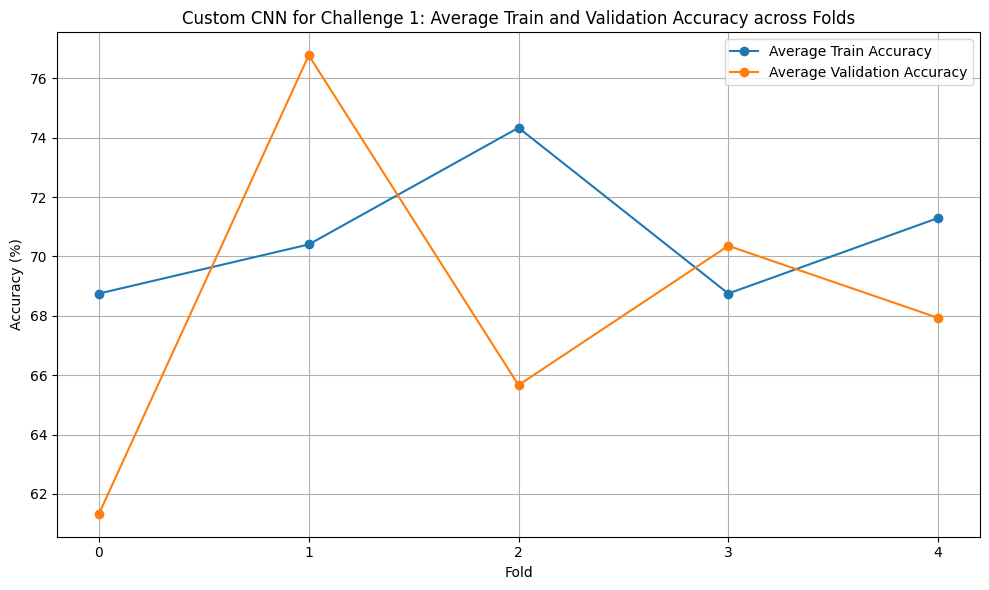

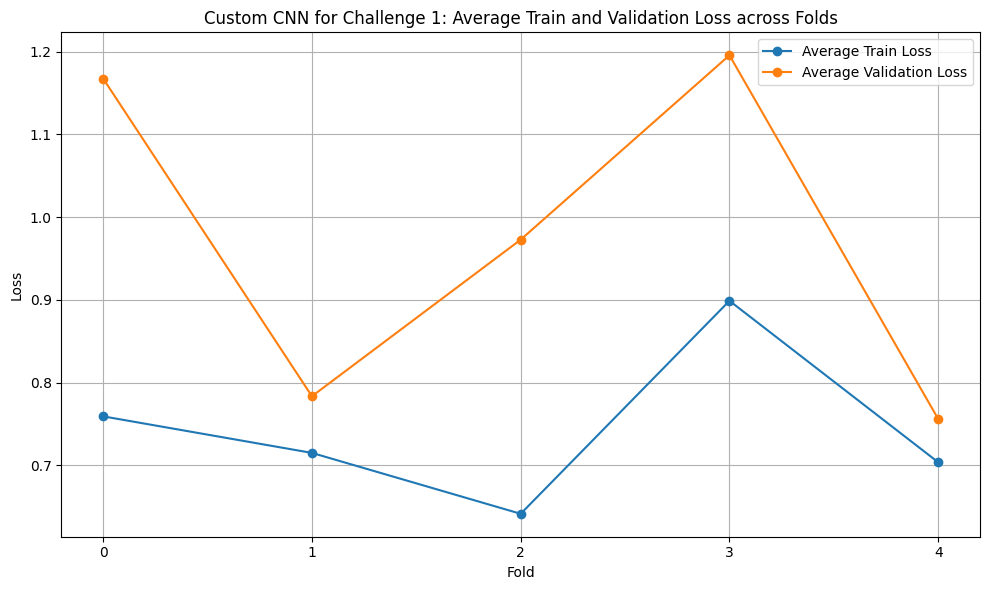

In [3]:
plot_avg_metrics(logs, "Custom CNN for Challenge 1")

In [5]:
logs_vit="""
FOLD 0
--------------------------------
Starting epoch 1
Train Loss: 1.7342, Train Acc: 45.00%, Val Loss: 0.5150, Val Acc: 80.00%
Starting epoch 2
Train Loss: 0.8953, Train Acc: 75.00%, Val Loss: 1.3709, Val Acc: 60.00%
Starting epoch 3
Train Loss: 0.6972, Train Acc: 75.00%, Val Loss: 0.8361, Val Acc: 80.00%
Starting epoch 4
Train Loss: 0.5429, Train Acc: 77.50%, Val Loss: 0.5366, Val Acc: 90.00%
Starting epoch 5
Train Loss: 0.4767, Train Acc: 75.00%, Val Loss: 0.7198, Val Acc: 70.00%
Starting epoch 6
Train Loss: 0.3835, Train Acc: 87.50%, Val Loss: 0.5894, Val Acc: 70.00%
Starting epoch 7
Train Loss: 0.4077, Train Acc: 87.50%, Val Loss: 0.5540, Val Acc: 70.00%
Starting epoch 8
Train Loss: 0.4136, Train Acc: 80.00%, Val Loss: 0.6259, Val Acc: 70.00%
Starting epoch 9
Train Loss: 0.4256, Train Acc: 85.00%, Val Loss: 0.4823, Val Acc: 90.00%
Starting epoch 10
Train Loss: 0.3953, Train Acc: 87.50%, Val Loss: 0.7291, Val Acc: 70.00%
Starting epoch 11
Train Loss: 0.4295, Train Acc: 80.00%, Val Loss: 0.4934, Val Acc: 80.00%
Starting epoch 12
Train Loss: 0.3164, Train Acc: 82.50%, Val Loss: 0.4562, Val Acc: 70.00%
Starting epoch 13
Train Loss: 0.2407, Train Acc: 90.00%, Val Loss: 0.4193, Val Acc: 80.00%
Starting epoch 14
Train Loss: 0.2383, Train Acc: 90.00%, Val Loss: 0.3972, Val Acc: 80.00%
Starting epoch 15
Train Loss: 0.3632, Train Acc: 87.50%, Val Loss: 0.4216, Val Acc: 70.00%
Starting epoch 16
Train Loss: 0.2571, Train Acc: 90.00%, Val Loss: 0.3216, Val Acc: 80.00%
Starting epoch 17
Train Loss: 0.2423, Train Acc: 90.00%, Val Loss: 0.3472, Val Acc: 80.00%
Starting epoch 18
Train Loss: 0.2046, Train Acc: 90.00%, Val Loss: 0.3567, Val Acc: 80.00%
Starting epoch 19
Train Loss: 0.2318, Train Acc: 90.00%, Val Loss: 0.3305, Val Acc: 80.00%
Starting epoch 20
Train Loss: 0.2046, Train Acc: 90.00%, Val Loss: 0.3350, Val Acc: 80.00%
Starting epoch 21
Train Loss: 0.3331, Train Acc: 90.00%, Val Loss: 0.3257, Val Acc: 80.00%
Starting epoch 22
Train Loss: 0.2191, Train Acc: 95.00%, Val Loss: 0.3078, Val Acc: 80.00%
Starting epoch 23
Train Loss: 0.1895, Train Acc: 95.00%, Val Loss: 0.2310, Val Acc: 90.00%
Starting epoch 24
Train Loss: 0.1269, Train Acc: 97.50%, Val Loss: 0.2345, Val Acc: 90.00%
Starting epoch 25
Train Loss: 0.2759, Train Acc: 90.00%, Val Loss: 0.3782, Val Acc: 80.00%
Starting epoch 26
Train Loss: 0.1579, Train Acc: 97.50%, Val Loss: 0.3663, Val Acc: 80.00%
Starting epoch 27
Train Loss: 0.1707, Train Acc: 95.00%, Val Loss: 0.2227, Val Acc: 90.00%
Starting epoch 28
Train Loss: 0.1479, Train Acc: 95.00%, Val Loss: 0.2569, Val Acc: 80.00%
Starting epoch 29
Train Loss: 0.1904, Train Acc: 92.50%, Val Loss: 0.2694, Val Acc: 80.00%
Starting epoch 30
Train Loss: 0.2262, Train Acc: 92.50%, Val Loss: 0.2293, Val Acc: 80.00%
Starting epoch 31
Train Loss: 0.1429, Train Acc: 97.50%, Val Loss: 0.2140, Val Acc: 80.00%
Starting epoch 32
Train Loss: 0.1636, Train Acc: 95.00%, Val Loss: 0.2348, Val Acc: 80.00%
Starting epoch 33
Train Loss: 0.1622, Train Acc: 95.00%, Val Loss: 0.2744, Val Acc: 80.00%
Starting epoch 34
Train Loss: 0.1651, Train Acc: 92.50%, Val Loss: 0.2558, Val Acc: 80.00%
Starting epoch 35
Train Loss: 0.1774, Train Acc: 95.00%, Val Loss: 0.2440, Val Acc: 80.00%
Starting epoch 36
Train Loss: 0.1785, Train Acc: 95.00%, Val Loss: 0.2527, Val Acc: 80.00%
Starting epoch 37
Train Loss: 0.1268, Train Acc: 95.00%, Val Loss: 0.2157, Val Acc: 80.00%
Starting epoch 38
Train Loss: 0.1050, Train Acc: 100.00%, Val Loss: 0.1968, Val Acc: 90.00%
Starting epoch 39
Train Loss: 0.1458, Train Acc: 95.00%, Val Loss: 0.1821, Val Acc: 90.00%
Starting epoch 40
Train Loss: 0.0737, Train Acc: 100.00%, Val Loss: 0.1894, Val Acc: 80.00%
Starting epoch 41
Train Loss: 0.1064, Train Acc: 97.50%, Val Loss: 0.2142, Val Acc: 80.00%
Starting epoch 42
Train Loss: 0.1605, Train Acc: 95.00%, Val Loss: 0.2256, Val Acc: 80.00%
Starting epoch 43
Train Loss: 0.0737, Train Acc: 97.50%, Val Loss: 0.2510, Val Acc: 80.00%
Starting epoch 44
Train Loss: 0.1604, Train Acc: 95.00%, Val Loss: 0.2550, Val Acc: 80.00%
Starting epoch 45
Train Loss: 0.1401, Train Acc: 95.00%, Val Loss: 0.2531, Val Acc: 80.00%
Starting epoch 46
Train Loss: 0.1443, Train Acc: 95.00%, Val Loss: 0.2310, Val Acc: 80.00%
Starting epoch 47
Train Loss: 0.1868, Train Acc: 95.00%, Val Loss: 0.2524, Val Acc: 80.00%
Starting epoch 48
Train Loss: 0.1308, Train Acc: 95.00%, Val Loss: 0.2698, Val Acc: 90.00%
Starting epoch 49
Train Loss: 0.1132, Train Acc: 95.00%, Val Loss: 0.2762, Val Acc: 90.00%
Starting epoch 50
Train Loss: 0.1596, Train Acc: 92.50%, Val Loss: 0.2837, Val Acc: 90.00%
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Train Loss: 0.7317, Train Acc: 80.00%, Val Loss: 0.4026, Val Acc: 80.00%
Starting epoch 2
Train Loss: 0.5828, Train Acc: 80.00%, Val Loss: 0.7362, Val Acc: 70.00%
Starting epoch 3
Train Loss: 0.3696, Train Acc: 85.00%, Val Loss: 0.1758, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.2957, Train Acc: 82.50%, Val Loss: 0.3766, Val Acc: 80.00%
Starting epoch 5
Train Loss: 0.3360, Train Acc: 87.50%, Val Loss: 0.2486, Val Acc: 90.00%
Starting epoch 6
Train Loss: 0.2648, Train Acc: 90.00%, Val Loss: 0.3914, Val Acc: 80.00%
Starting epoch 7
Train Loss: 0.2384, Train Acc: 87.50%, Val Loss: 0.4305, Val Acc: 80.00%
Starting epoch 8
Train Loss: 0.1340, Train Acc: 95.00%, Val Loss: 0.3321, Val Acc: 80.00%
Starting epoch 9
Train Loss: 0.1344, Train Acc: 95.00%, Val Loss: 0.2874, Val Acc: 90.00%
Starting epoch 10
Train Loss: 0.3228, Train Acc: 92.50%, Val Loss: 0.1415, Val Acc: 90.00%
Starting epoch 11
Train Loss: 0.2348, Train Acc: 92.50%, Val Loss: 0.2073, Val Acc: 80.00%
Starting epoch 12
Train Loss: 0.1458, Train Acc: 95.00%, Val Loss: 0.2782, Val Acc: 80.00%
Starting epoch 13
Train Loss: 0.0829, Train Acc: 97.50%, Val Loss: 0.1841, Val Acc: 90.00%
Starting epoch 14
Train Loss: 0.1797, Train Acc: 97.50%, Val Loss: 0.1684, Val Acc: 90.00%
Starting epoch 15
Train Loss: 0.1051, Train Acc: 97.50%, Val Loss: 0.0937, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0664, Train Acc: 100.00%, Val Loss: 0.0819, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0598, Train Acc: 97.50%, Val Loss: 0.0738, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.1229, Train Acc: 92.50%, Val Loss: 0.0920, Val Acc: 90.00%
Starting epoch 19
Train Loss: 0.1364, Train Acc: 95.00%, Val Loss: 0.1746, Val Acc: 90.00%
Starting epoch 20
Train Loss: 0.1044, Train Acc: 95.00%, Val Loss: 0.2058, Val Acc: 90.00%
Starting epoch 21
Train Loss: 0.1613, Train Acc: 95.00%, Val Loss: 0.1171, Val Acc: 90.00%
Starting epoch 22
Train Loss: 0.0618, Train Acc: 100.00%, Val Loss: 0.0880, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.1323, Train Acc: 95.00%, Val Loss: 0.1775, Val Acc: 90.00%
Starting epoch 24
Train Loss: 0.1106, Train Acc: 95.00%, Val Loss: 0.1861, Val Acc: 90.00%
Starting epoch 25
Train Loss: 0.0719, Train Acc: 97.50%, Val Loss: 0.0953, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0692, Train Acc: 100.00%, Val Loss: 0.0809, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0573, Train Acc: 97.50%, Val Loss: 0.0898, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0424, Train Acc: 100.00%, Val Loss: 0.0680, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0200, Train Acc: 100.00%, Val Loss: 0.0578, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0388, Train Acc: 100.00%, Val Loss: 0.0550, Val Acc: 100.00%
Starting epoch 31
Train Loss: 0.0518, Train Acc: 97.50%, Val Loss: 0.0581, Val Acc: 100.00%
Starting epoch 32
Train Loss: 0.0427, Train Acc: 97.50%, Val Loss: 0.0618, Val Acc: 100.00%
Starting epoch 33
Train Loss: 0.0448, Train Acc: 100.00%, Val Loss: 0.0578, Val Acc: 100.00%
Starting epoch 34
Train Loss: 0.0930, Train Acc: 97.50%, Val Loss: 0.0955, Val Acc: 100.00%
Starting epoch 35
Train Loss: 0.0777, Train Acc: 95.00%, Val Loss: 0.1232, Val Acc: 90.00%
Starting epoch 36
Train Loss: 0.0863, Train Acc: 97.50%, Val Loss: 0.0782, Val Acc: 100.00%
Starting epoch 37
Train Loss: 0.0251, Train Acc: 100.00%, Val Loss: 0.0512, Val Acc: 100.00%
Starting epoch 38
Train Loss: 0.0997, Train Acc: 95.00%, Val Loss: 0.2304, Val Acc: 90.00%
Starting epoch 39
Train Loss: 0.0352, Train Acc: 97.50%, Val Loss: 0.2901, Val Acc: 90.00%
Starting epoch 40
Train Loss: 0.0185, Train Acc: 100.00%, Val Loss: 0.3062, Val Acc: 90.00%
Starting epoch 41
Train Loss: 0.1261, Train Acc: 95.00%, Val Loss: 0.2421, Val Acc: 90.00%
Starting epoch 42
Train Loss: 0.0225, Train Acc: 100.00%, Val Loss: 0.2238, Val Acc: 90.00%
Starting epoch 43
Train Loss: 0.0386, Train Acc: 100.00%, Val Loss: 0.2031, Val Acc: 90.00%
Starting epoch 44
Train Loss: 0.0431, Train Acc: 100.00%, Val Loss: 0.1808, Val Acc: 90.00%
Starting epoch 45
Train Loss: 0.0189, Train Acc: 100.00%, Val Loss: 0.1564, Val Acc: 90.00%
Starting epoch 46
Train Loss: 0.0109, Train Acc: 100.00%, Val Loss: 0.1418, Val Acc: 90.00%
Starting epoch 47
Train Loss: 0.0139, Train Acc: 100.00%, Val Loss: 0.1356, Val Acc: 90.00%
Starting epoch 48
Train Loss: 0.0256, Train Acc: 100.00%, Val Loss: 0.1243, Val Acc: 90.00%
Starting epoch 49
Train Loss: 0.0162, Train Acc: 100.00%, Val Loss: 0.1173, Val Acc: 90.00%
Starting epoch 50
Train Loss: 0.0247, Train Acc: 100.00%, Val Loss: 0.0868, Val Acc: 100.00%
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Train Loss: 0.3372, Train Acc: 92.50%, Val Loss: 0.0662, Val Acc: 100.00%
Starting epoch 2
Train Loss: 0.1707, Train Acc: 95.00%, Val Loss: 0.0710, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.2315, Train Acc: 87.50%, Val Loss: 0.0307, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.3373, Train Acc: 95.00%, Val Loss: 0.0614, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.2427, Train Acc: 92.50%, Val Loss: 0.1183, Val Acc: 90.00%
Starting epoch 6
Train Loss: 0.0865, Train Acc: 97.50%, Val Loss: 0.0894, Val Acc: 100.00%
Starting epoch 7
Train Loss: 0.1205, Train Acc: 92.50%, Val Loss: 0.1274, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.1247, Train Acc: 95.00%, Val Loss: 0.0539, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0582, Train Acc: 97.50%, Val Loss: 0.1000, Val Acc: 90.00%
Starting epoch 10
Train Loss: 0.0670, Train Acc: 97.50%, Val Loss: 0.1130, Val Acc: 90.00%
Starting epoch 11
Train Loss: 0.0293, Train Acc: 97.50%, Val Loss: 0.0318, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0114, Train Acc: 100.00%, Val Loss: 0.0165, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0564, Train Acc: 97.50%, Val Loss: 0.0189, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0812, Train Acc: 95.00%, Val Loss: 0.0282, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0576, Train Acc: 97.50%, Val Loss: 0.0298, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0478, Train Acc: 97.50%, Val Loss: 0.0392, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0216, Train Acc: 100.00%, Val Loss: 0.0473, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0291, Train Acc: 100.00%, Val Loss: 0.0264, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0323, Train Acc: 97.50%, Val Loss: 0.0933, Val Acc: 90.00%
Starting epoch 20
Train Loss: 0.0220, Train Acc: 100.00%, Val Loss: 0.2491, Val Acc: 90.00%
Starting epoch 21
Train Loss: 0.0092, Train Acc: 100.00%, Val Loss: 0.2380, Val Acc: 90.00%
Starting epoch 22
Train Loss: 0.0084, Train Acc: 100.00%, Val Loss: 0.2031, Val Acc: 90.00%
Starting epoch 23
Train Loss: 0.0542, Train Acc: 97.50%, Val Loss: 0.1558, Val Acc: 90.00%
Starting epoch 24
Train Loss: 0.0147, Train Acc: 100.00%, Val Loss: 0.2293, Val Acc: 90.00%
Starting epoch 25
Train Loss: 0.0084, Train Acc: 100.00%, Val Loss: 0.1808, Val Acc: 90.00%
Starting epoch 26
Train Loss: 0.0807, Train Acc: 97.50%, Val Loss: 0.1655, Val Acc: 90.00%
Starting epoch 27
Train Loss: 0.0123, Train Acc: 100.00%, Val Loss: 0.1714, Val Acc: 90.00%
Starting epoch 28
Train Loss: 0.0309, Train Acc: 100.00%, Val Loss: 0.0683, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0181, Train Acc: 100.00%, Val Loss: 0.0155, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0021, Train Acc: 100.00%, Val Loss: 0.0083, Val Acc: 100.00%
Starting epoch 31
Train Loss: 0.0195, Train Acc: 100.00%, Val Loss: 0.0077, Val Acc: 100.00%
Starting epoch 32
Train Loss: 0.0381, Train Acc: 97.50%, Val Loss: 0.0097, Val Acc: 100.00%
Starting epoch 33
Train Loss: 0.0203, Train Acc: 97.50%, Val Loss: 0.0126, Val Acc: 100.00%
Starting epoch 34
Train Loss: 0.0258, Train Acc: 97.50%, Val Loss: 0.0076, Val Acc: 100.00%
Starting epoch 35
Train Loss: 0.0200, Train Acc: 100.00%, Val Loss: 0.0067, Val Acc: 100.00%
Starting epoch 36
Train Loss: 0.0364, Train Acc: 97.50%, Val Loss: 0.0098, Val Acc: 100.00%
Starting epoch 37
Train Loss: 0.0143, Train Acc: 100.00%, Val Loss: 0.0298, Val Acc: 100.00%
Starting epoch 38
Train Loss: 0.0135, Train Acc: 100.00%, Val Loss: 0.0251, Val Acc: 100.00%
Starting epoch 39
Train Loss: 0.0039, Train Acc: 100.00%, Val Loss: 0.0190, Val Acc: 100.00%
Starting epoch 40
Train Loss: 0.0038, Train Acc: 100.00%, Val Loss: 0.0166, Val Acc: 100.00%
Starting epoch 41
Train Loss: 0.0061, Train Acc: 100.00%, Val Loss: 0.0161, Val Acc: 100.00%
Starting epoch 42
Train Loss: 0.0087, Train Acc: 100.00%, Val Loss: 0.0156, Val Acc: 100.00%
Starting epoch 43
Train Loss: 0.0087, Train Acc: 100.00%, Val Loss: 0.0148, Val Acc: 100.00%
Starting epoch 44
Train Loss: 0.0047, Train Acc: 100.00%, Val Loss: 0.0141, Val Acc: 100.00%
Starting epoch 45
Train Loss: 0.0078, Train Acc: 100.00%, Val Loss: 0.0130, Val Acc: 100.00%
Starting epoch 46
Train Loss: 0.0047, Train Acc: 100.00%, Val Loss: 0.0120, Val Acc: 100.00%
Starting epoch 47
Train Loss: 0.0033, Train Acc: 100.00%, Val Loss: 0.0116, Val Acc: 100.00%
Starting epoch 48
Train Loss: 0.0046, Train Acc: 100.00%, Val Loss: 0.0112, Val Acc: 100.00%
Starting epoch 49
Train Loss: 0.0061, Train Acc: 100.00%, Val Loss: 0.0109, Val Acc: 100.00%
Starting epoch 50
Train Loss: 0.0045, Train Acc: 100.00%, Val Loss: 0.0105, Val Acc: 100.00%
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Train Loss: 0.0274, Train Acc: 97.50%, Val Loss: 1.1271, Val Acc: 80.00%
Starting epoch 2
Train Loss: 0.3128, Train Acc: 87.50%, Val Loss: 0.0073, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.0580, Train Acc: 97.50%, Val Loss: 0.0191, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.1141, Train Acc: 92.50%, Val Loss: 0.0010, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.0146, Train Acc: 100.00%, Val Loss: 0.0043, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0135, Train Acc: 100.00%, Val Loss: 0.1543, Val Acc: 90.00%
Starting epoch 7
Train Loss: 0.2200, Train Acc: 97.50%, Val Loss: 0.0245, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.0205, Train Acc: 100.00%, Val Loss: 0.0016, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0351, Train Acc: 97.50%, Val Loss: 0.0026, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.0167, Train Acc: 100.00%, Val Loss: 0.0044, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.0097, Train Acc: 100.00%, Val Loss: 0.0021, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0028, Train Acc: 100.00%, Val Loss: 0.0016, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0859, Train Acc: 97.50%, Val Loss: 0.0014, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0240, Train Acc: 97.50%, Val Loss: 0.0075, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0106, Train Acc: 100.00%, Val Loss: 0.0141, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0122, Train Acc: 100.00%, Val Loss: 0.0106, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0026, Train Acc: 100.00%, Val Loss: 0.0088, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0225, Train Acc: 100.00%, Val Loss: 0.0077, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0361, Train Acc: 97.50%, Val Loss: 0.0038, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0067, Train Acc: 100.00%, Val Loss: 0.0010, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0019, Train Acc: 100.00%, Val Loss: 0.0008, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0222, Train Acc: 97.50%, Val Loss: 0.0008, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0051, Train Acc: 100.00%, Val Loss: 0.0017, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0079, Train Acc: 100.00%, Val Loss: 0.0014, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0030, Train Acc: 100.00%, Val Loss: 0.0011, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0030, Train Acc: 100.00%, Val Loss: 0.0009, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0089, Train Acc: 100.00%, Val Loss: 0.0006, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0039, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0051, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0031, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 31
Train Loss: 0.0031, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 32
Train Loss: 0.0102, Train Acc: 100.00%, Val Loss: 0.0006, Val Acc: 100.00%
Starting epoch 33
Train Loss: 0.0116, Train Acc: 100.00%, Val Loss: 0.0009, Val Acc: 100.00%
Starting epoch 34
Train Loss: 0.0018, Train Acc: 100.00%, Val Loss: 0.0011, Val Acc: 100.00%
Starting epoch 35
Train Loss: 0.0049, Train Acc: 100.00%, Val Loss: 0.0011, Val Acc: 100.00%
Starting epoch 36
Train Loss: 0.0013, Train Acc: 100.00%, Val Loss: 0.0010, Val Acc: 100.00%
Starting epoch 37
Train Loss: 0.0014, Train Acc: 100.00%, Val Loss: 0.0010, Val Acc: 100.00%
Starting epoch 38
Train Loss: 0.0015, Train Acc: 100.00%, Val Loss: 0.0009, Val Acc: 100.00%
Starting epoch 39
Train Loss: 0.0011, Train Acc: 100.00%, Val Loss: 0.0009, Val Acc: 100.00%
Starting epoch 40
Train Loss: 0.0805, Train Acc: 97.50%, Val Loss: 0.0021, Val Acc: 100.00%
Starting epoch 41
Train Loss: 0.0107, Train Acc: 100.00%, Val Loss: 0.0036, Val Acc: 100.00%
Starting epoch 42
Train Loss: 0.0053, Train Acc: 100.00%, Val Loss: 0.0046, Val Acc: 100.00%
Starting epoch 43
Train Loss: 0.0031, Train Acc: 100.00%, Val Loss: 0.0048, Val Acc: 100.00%
Starting epoch 44
Train Loss: 0.0111, Train Acc: 100.00%, Val Loss: 0.0041, Val Acc: 100.00%
Starting epoch 45
Train Loss: 0.0024, Train Acc: 100.00%, Val Loss: 0.0033, Val Acc: 100.00%
Starting epoch 46
Train Loss: 0.0044, Train Acc: 100.00%, Val Loss: 0.0029, Val Acc: 100.00%
Starting epoch 47
Train Loss: 0.0022, Train Acc: 100.00%, Val Loss: 0.0027, Val Acc: 100.00%
Starting epoch 48
Train Loss: 0.0008, Train Acc: 100.00%, Val Loss: 0.0025, Val Acc: 100.00%
Starting epoch 49
Train Loss: 0.0048, Train Acc: 100.00%, Val Loss: 0.0024, Val Acc: 100.00%
Starting epoch 50
Train Loss: 0.0026, Train Acc: 100.00%, Val Loss: 0.0023, Val Acc: 100.00%
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Train Loss: 0.1392, Train Acc: 95.00%, Val Loss: 0.2538, Val Acc: 90.00%
Starting epoch 2
Train Loss: 0.0668, Train Acc: 97.50%, Val Loss: 0.0020, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.0261, Train Acc: 100.00%, Val Loss: 0.0020, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.1384, Train Acc: 92.50%, Val Loss: 0.0019, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.1625, Train Acc: 95.00%, Val Loss: 0.0135, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0083, Train Acc: 100.00%, Val Loss: 0.1446, Val Acc: 90.00%
Starting epoch 7
Train Loss: 0.0597, Train Acc: 95.00%, Val Loss: 0.0041, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.1011, Train Acc: 97.50%, Val Loss: 0.0270, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0537, Train Acc: 97.50%, Val Loss: 0.0057, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.2440, Train Acc: 95.00%, Val Loss: 0.0068, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.1045, Train Acc: 97.50%, Val Loss: 0.0076, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0065, Train Acc: 100.00%, Val Loss: 0.0066, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0071, Train Acc: 100.00%, Val Loss: 0.0070, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0078, Train Acc: 100.00%, Val Loss: 0.0067, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0150, Train Acc: 100.00%, Val Loss: 0.0188, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0108, Train Acc: 100.00%, Val Loss: 0.0393, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0052, Train Acc: 100.00%, Val Loss: 0.0547, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0047, Train Acc: 100.00%, Val Loss: 0.0347, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0041, Train Acc: 100.00%, Val Loss: 0.0212, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0104, Train Acc: 100.00%, Val Loss: 0.0103, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0183, Train Acc: 97.50%, Val Loss: 0.0089, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0036, Train Acc: 100.00%, Val Loss: 0.0103, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0197, Train Acc: 100.00%, Val Loss: 0.0128, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0066, Train Acc: 100.00%, Val Loss: 0.0192, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0007, Train Acc: 100.00%, Val Loss: 0.0248, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0068, Train Acc: 100.00%, Val Loss: 0.0208, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0050, Train Acc: 100.00%, Val Loss: 0.0180, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0067, Train Acc: 100.00%, Val Loss: 0.0156, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0009, Train Acc: 100.00%, Val Loss: 0.0143, Val Acc: 100.00%
Early stopping triggered.
"""

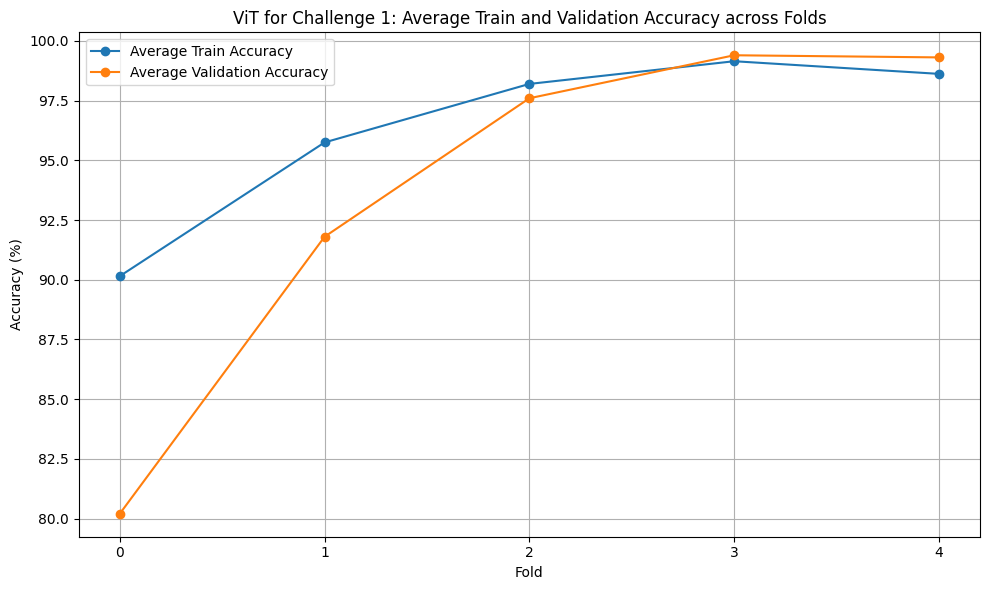

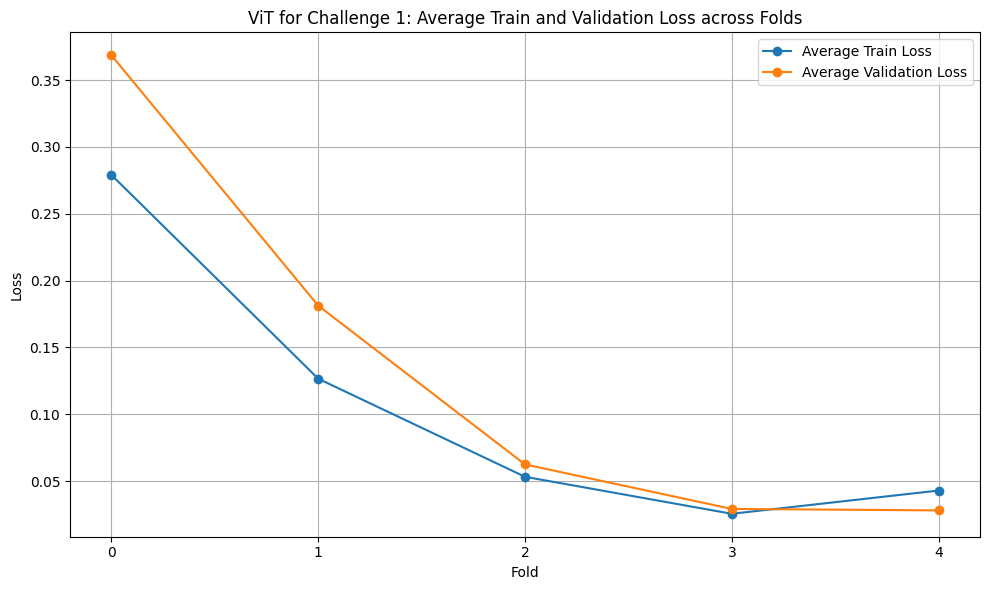

In [6]:
plot_avg_metrics(logs_vit, "ViT for Challenge 1")

In [9]:
MobileNet_logs_c2="""
FOLD 0
--------------------------------
Starting epoch 1
Train Loss: 2.7680, Train Acc: 5.00%, Val Loss: 2.3530, Val Acc: 0.00%
Starting epoch 2
Train Loss: 2.4923, Train Acc: 15.00%, Val Loss: 2.2751, Val Acc: 10.00%
Starting epoch 3
Train Loss: 2.4216, Train Acc: 20.00%, Val Loss: 2.1477, Val Acc: 20.00%
Starting epoch 4
Train Loss: 2.2317, Train Acc: 20.00%, Val Loss: 2.0767, Val Acc: 20.00%
Starting epoch 5
Train Loss: 2.1664, Train Acc: 20.00%, Val Loss: 2.0892, Val Acc: 20.00%
Starting epoch 6
Train Loss: 2.3874, Train Acc: 20.00%, Val Loss: 2.0064, Val Acc: 30.00%
Starting epoch 7
Train Loss: 2.1416, Train Acc: 20.00%, Val Loss: 2.0487, Val Acc: 30.00%
Starting epoch 8
Train Loss: 2.0813, Train Acc: 25.00%, Val Loss: 1.9818, Val Acc: 20.00%
Starting epoch 9
Train Loss: 1.8639, Train Acc: 32.50%, Val Loss: 1.7933, Val Acc: 60.00%
Starting epoch 10
Train Loss: 1.8663, Train Acc: 35.00%, Val Loss: 1.8812, Val Acc: 40.00%
Starting epoch 11
Train Loss: 1.6177, Train Acc: 50.00%, Val Loss: 1.8508, Val Acc: 40.00%
Starting epoch 12
Train Loss: 1.6171, Train Acc: 52.50%, Val Loss: 1.7509, Val Acc: 60.00%
Starting epoch 13
Train Loss: 1.5998, Train Acc: 42.50%, Val Loss: 1.6495, Val Acc: 70.00%
Starting epoch 14
Train Loss: 1.5726, Train Acc: 45.00%, Val Loss: 1.4867, Val Acc: 70.00%
Starting epoch 15
Train Loss: 1.3365, Train Acc: 55.00%, Val Loss: 1.5614, Val Acc: 60.00%
Starting epoch 16
Train Loss: 1.4261, Train Acc: 57.50%, Val Loss: 1.5291, Val Acc: 60.00%
Starting epoch 17
Train Loss: 1.4954, Train Acc: 45.00%, Val Loss: 1.6384, Val Acc: 60.00%
Starting epoch 18
Train Loss: 1.3807, Train Acc: 50.00%, Val Loss: 1.5647, Val Acc: 60.00%
Starting epoch 19
Train Loss: 1.4313, Train Acc: 55.00%, Val Loss: 1.4169, Val Acc: 70.00%
Starting epoch 20
Train Loss: 1.4421, Train Acc: 55.00%, Val Loss: 1.3667, Val Acc: 70.00%
Starting epoch 21
Train Loss: 1.3418, Train Acc: 55.00%, Val Loss: 1.2638, Val Acc: 70.00%
Starting epoch 22
Train Loss: 1.5378, Train Acc: 42.50%, Val Loss: 1.5678, Val Acc: 60.00%
Starting epoch 23
Train Loss: 1.3124, Train Acc: 52.50%, Val Loss: 1.4419, Val Acc: 70.00%
Starting epoch 24
Train Loss: 1.3402, Train Acc: 62.50%, Val Loss: 1.4936, Val Acc: 60.00%
Starting epoch 25
Train Loss: 1.4036, Train Acc: 57.50%, Val Loss: 1.5413, Val Acc: 70.00%
Starting epoch 26
Train Loss: 1.5681, Train Acc: 40.00%, Val Loss: 1.4557, Val Acc: 70.00%
Starting epoch 27
Train Loss: 1.1661, Train Acc: 57.50%, Val Loss: 1.4269, Val Acc: 70.00%
Starting epoch 28
Train Loss: 1.4306, Train Acc: 52.50%, Val Loss: 1.3984, Val Acc: 70.00%
Starting epoch 29
Train Loss: 1.3424, Train Acc: 57.50%, Val Loss: 1.4416, Val Acc: 70.00%
Starting epoch 30
Train Loss: 1.7059, Train Acc: 42.50%, Val Loss: 1.3009, Val Acc: 80.00%
Starting epoch 31
Train Loss: 1.5668, Train Acc: 35.00%, Val Loss: 1.4037, Val Acc: 70.00%
Starting epoch 32
Train Loss: 1.4849, Train Acc: 50.00%, Val Loss: 1.3281, Val Acc: 70.00%
Starting epoch 33
Train Loss: 1.4350, Train Acc: 50.00%, Val Loss: 1.4069, Val Acc: 80.00%
Starting epoch 34
Train Loss: 1.3939, Train Acc: 52.50%, Val Loss: 1.3846, Val Acc: 80.00%
Starting epoch 35
Train Loss: 1.4950, Train Acc: 47.50%, Val Loss: 1.4336, Val Acc: 70.00%
Starting epoch 36
Train Loss: 1.1827, Train Acc: 57.50%, Val Loss: 1.4685, Val Acc: 70.00%
Starting epoch 37
Train Loss: 1.2770, Train Acc: 62.50%, Val Loss: 1.4466, Val Acc: 80.00%
Starting epoch 38
Train Loss: 1.5217, Train Acc: 40.00%, Val Loss: 1.3570, Val Acc: 80.00%
Starting epoch 39
Train Loss: 1.3527, Train Acc: 50.00%, Val Loss: 1.4545, Val Acc: 70.00%
Starting epoch 40
Train Loss: 1.5397, Train Acc: 47.50%, Val Loss: 1.3976, Val Acc: 70.00%
Starting epoch 41
Train Loss: 1.3482, Train Acc: 52.50%, Val Loss: 1.3819, Val Acc: 80.00%
Starting epoch 42
Train Loss: 1.4049, Train Acc: 52.50%, Val Loss: 1.4418, Val Acc: 70.00%
Starting epoch 43
Train Loss: 1.6100, Train Acc: 37.50%, Val Loss: 1.4643, Val Acc: 70.00%
Starting epoch 44
Train Loss: 1.5491, Train Acc: 50.00%, Val Loss: 1.5819, Val Acc: 70.00%
Starting epoch 45
Train Loss: 1.1978, Train Acc: 62.50%, Val Loss: 1.3938, Val Acc: 70.00%
Starting epoch 46
Train Loss: 1.3874, Train Acc: 52.50%, Val Loss: 1.4826, Val Acc: 60.00%
Early stopping triggered.
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Train Loss: 1.3424, Train Acc: 55.00%, Val Loss: 1.3639, Val Acc: 70.00%
Starting epoch 2
Train Loss: 1.2646, Train Acc: 65.00%, Val Loss: 1.3268, Val Acc: 70.00%
Starting epoch 3
Train Loss: 1.2795, Train Acc: 57.50%, Val Loss: 1.3929, Val Acc: 80.00%
Starting epoch 4
Train Loss: 1.2192, Train Acc: 62.50%, Val Loss: 1.3869, Val Acc: 60.00%
Starting epoch 5
Train Loss: 1.2674, Train Acc: 55.00%, Val Loss: 1.3216, Val Acc: 60.00%
Starting epoch 6
Train Loss: 0.9723, Train Acc: 75.00%, Val Loss: 1.2866, Val Acc: 60.00%
Starting epoch 7
Train Loss: 0.9644, Train Acc: 65.00%, Val Loss: 1.2377, Val Acc: 60.00%
Starting epoch 8
Train Loss: 1.1177, Train Acc: 57.50%, Val Loss: 1.3815, Val Acc: 60.00%
Starting epoch 9
Train Loss: 0.9729, Train Acc: 60.00%, Val Loss: 1.3107, Val Acc: 60.00%
Starting epoch 10
Train Loss: 0.9949, Train Acc: 67.50%, Val Loss: 0.9801, Val Acc: 80.00%
Starting epoch 11
Train Loss: 1.0277, Train Acc: 70.00%, Val Loss: 1.0681, Val Acc: 70.00%
Starting epoch 12
Train Loss: 0.9415, Train Acc: 65.00%, Val Loss: 1.1574, Val Acc: 80.00%
Starting epoch 13
Train Loss: 0.9189, Train Acc: 57.50%, Val Loss: 1.0978, Val Acc: 80.00%
Starting epoch 14
Train Loss: 0.8336, Train Acc: 70.00%, Val Loss: 1.2487, Val Acc: 50.00%
Starting epoch 15
Train Loss: 0.9002, Train Acc: 70.00%, Val Loss: 1.1160, Val Acc: 60.00%
Starting epoch 16
Train Loss: 0.9457, Train Acc: 57.50%, Val Loss: 1.1084, Val Acc: 60.00%
Starting epoch 17
Train Loss: 0.9184, Train Acc: 72.50%, Val Loss: 0.8999, Val Acc: 90.00%
Starting epoch 18
Train Loss: 0.7909, Train Acc: 67.50%, Val Loss: 1.0081, Val Acc: 90.00%
Starting epoch 19
Train Loss: 0.8692, Train Acc: 57.50%, Val Loss: 1.0776, Val Acc: 90.00%
Starting epoch 20
Train Loss: 0.7953, Train Acc: 67.50%, Val Loss: 1.1949, Val Acc: 50.00%
Starting epoch 21
Train Loss: 0.8505, Train Acc: 72.50%, Val Loss: 1.1847, Val Acc: 60.00%
Starting epoch 22
Train Loss: 0.8059, Train Acc: 75.00%, Val Loss: 1.4188, Val Acc: 50.00%
Starting epoch 23
Train Loss: 0.9039, Train Acc: 57.50%, Val Loss: 1.0464, Val Acc: 60.00%
Starting epoch 24
Train Loss: 0.9692, Train Acc: 62.50%, Val Loss: 1.1443, Val Acc: 70.00%
Starting epoch 25
Train Loss: 1.1078, Train Acc: 47.50%, Val Loss: 0.9004, Val Acc: 90.00%
Starting epoch 26
Train Loss: 0.9761, Train Acc: 67.50%, Val Loss: 1.1114, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.7924, Train Acc: 70.00%, Val Loss: 1.0869, Val Acc: 80.00%
Starting epoch 28
Train Loss: 0.8269, Train Acc: 62.50%, Val Loss: 1.1092, Val Acc: 80.00%
Starting epoch 29
Train Loss: 0.7867, Train Acc: 72.50%, Val Loss: 1.0687, Val Acc: 70.00%
Starting epoch 30
Train Loss: 0.9084, Train Acc: 67.50%, Val Loss: 1.1057, Val Acc: 60.00%
Starting epoch 31
Train Loss: 0.9413, Train Acc: 62.50%, Val Loss: 1.2456, Val Acc: 50.00%
Starting epoch 32
Train Loss: 0.9247, Train Acc: 67.50%, Val Loss: 1.1147, Val Acc: 80.00%
Starting epoch 33
Train Loss: 0.9107, Train Acc: 65.00%, Val Loss: 1.0824, Val Acc: 80.00%
Starting epoch 34
Train Loss: 0.8363, Train Acc: 75.00%, Val Loss: 1.3457, Val Acc: 70.00%
Starting epoch 35
Train Loss: 0.9523, Train Acc: 67.50%, Val Loss: 1.2615, Val Acc: 70.00%
Starting epoch 36
Train Loss: 0.8657, Train Acc: 72.50%, Val Loss: 1.2481, Val Acc: 60.00%
Starting epoch 37
Train Loss: 1.0271, Train Acc: 60.00%, Val Loss: 1.2637, Val Acc: 60.00%
Starting epoch 38
Train Loss: 1.0297, Train Acc: 57.50%, Val Loss: 1.0830, Val Acc: 70.00%
Starting epoch 39
Train Loss: 0.9702, Train Acc: 62.50%, Val Loss: 1.0683, Val Acc: 70.00%
Starting epoch 40
Train Loss: 0.8442, Train Acc: 67.50%, Val Loss: 1.0363, Val Acc: 80.00%
Starting epoch 41
Train Loss: 1.0129, Train Acc: 57.50%, Val Loss: 1.2209, Val Acc: 60.00%
Starting epoch 42
Train Loss: 0.9166, Train Acc: 57.50%, Val Loss: 1.2343, Val Acc: 50.00%
Early stopping triggered.
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Train Loss: 0.7752, Train Acc: 75.00%, Val Loss: 1.1722, Val Acc: 60.00%
Starting epoch 2
Train Loss: 0.7543, Train Acc: 72.50%, Val Loss: 1.1128, Val Acc: 70.00%
Starting epoch 3
Train Loss: 1.0134, Train Acc: 60.00%, Val Loss: 1.1739, Val Acc: 60.00%
Starting epoch 4
Train Loss: 0.8753, Train Acc: 65.00%, Val Loss: 1.1253, Val Acc: 50.00%
Starting epoch 5
Train Loss: 0.8084, Train Acc: 60.00%, Val Loss: 1.0566, Val Acc: 60.00%
Starting epoch 6
Train Loss: 0.8457, Train Acc: 62.50%, Val Loss: 1.0211, Val Acc: 60.00%
Starting epoch 7
Train Loss: 0.8857, Train Acc: 57.50%, Val Loss: 1.0085, Val Acc: 70.00%
Starting epoch 8
Train Loss: 0.7110, Train Acc: 75.00%, Val Loss: 0.9300, Val Acc: 80.00%
Starting epoch 9
Train Loss: 0.8637, Train Acc: 52.50%, Val Loss: 0.9621, Val Acc: 70.00%
Starting epoch 10
Train Loss: 0.8261, Train Acc: 62.50%, Val Loss: 1.1034, Val Acc: 50.00%
Starting epoch 11
Train Loss: 0.7764, Train Acc: 67.50%, Val Loss: 0.9385, Val Acc: 70.00%
Starting epoch 12
Train Loss: 0.7388, Train Acc: 72.50%, Val Loss: 0.9849, Val Acc: 50.00%
Starting epoch 13
Train Loss: 0.5894, Train Acc: 77.50%, Val Loss: 0.9403, Val Acc: 60.00%
Starting epoch 14
Train Loss: 0.7141, Train Acc: 67.50%, Val Loss: 0.8980, Val Acc: 60.00%
Starting epoch 15
Train Loss: 0.8350, Train Acc: 62.50%, Val Loss: 0.8922, Val Acc: 80.00%
Starting epoch 16
Train Loss: 0.8106, Train Acc: 70.00%, Val Loss: 0.7623, Val Acc: 70.00%
Starting epoch 17
Train Loss: 0.8068, Train Acc: 57.50%, Val Loss: 1.0504, Val Acc: 60.00%
Starting epoch 18
Train Loss: 0.7009, Train Acc: 72.50%, Val Loss: 1.0581, Val Acc: 50.00%
Starting epoch 19
Train Loss: 0.6712, Train Acc: 70.00%, Val Loss: 1.0031, Val Acc: 60.00%
Starting epoch 20
Train Loss: 0.6175, Train Acc: 77.50%, Val Loss: 1.0447, Val Acc: 60.00%
Starting epoch 21
Train Loss: 0.7472, Train Acc: 65.00%, Val Loss: 0.9736, Val Acc: 50.00%
Starting epoch 22
Train Loss: 0.8717, Train Acc: 52.50%, Val Loss: 0.9362, Val Acc: 80.00%
Starting epoch 23
Train Loss: 0.8401, Train Acc: 60.00%, Val Loss: 0.9532, Val Acc: 60.00%
Starting epoch 24
Train Loss: 0.7786, Train Acc: 67.50%, Val Loss: 0.9989, Val Acc: 60.00%
Starting epoch 25
Train Loss: 0.5560, Train Acc: 77.50%, Val Loss: 0.8671, Val Acc: 80.00%
Starting epoch 26
Train Loss: 0.7077, Train Acc: 60.00%, Val Loss: 0.9652, Val Acc: 50.00%
Starting epoch 27
Train Loss: 0.7629, Train Acc: 65.00%, Val Loss: 1.0369, Val Acc: 60.00%
Starting epoch 28
Train Loss: 0.7642, Train Acc: 65.00%, Val Loss: 0.9214, Val Acc: 70.00%
Starting epoch 29
Train Loss: 0.8669, Train Acc: 60.00%, Val Loss: 0.9429, Val Acc: 70.00%
Starting epoch 30
Train Loss: 0.6691, Train Acc: 70.00%, Val Loss: 1.0395, Val Acc: 60.00%
Starting epoch 31
Train Loss: 0.6575, Train Acc: 72.50%, Val Loss: 0.8675, Val Acc: 60.00%
Starting epoch 32
Train Loss: 0.6590, Train Acc: 77.50%, Val Loss: 0.9005, Val Acc: 60.00%
Starting epoch 33
Train Loss: 0.8249, Train Acc: 62.50%, Val Loss: 1.0304, Val Acc: 60.00%
Starting epoch 34
Train Loss: 0.6523, Train Acc: 72.50%, Val Loss: 0.9768, Val Acc: 40.00%
Starting epoch 35
Train Loss: 0.8491, Train Acc: 67.50%, Val Loss: 1.0537, Val Acc: 70.00%
Starting epoch 36
Train Loss: 0.8296, Train Acc: 60.00%, Val Loss: 1.0732, Val Acc: 40.00%
Starting epoch 37
Train Loss: 0.7990, Train Acc: 65.00%, Val Loss: 1.0124, Val Acc: 50.00%
Starting epoch 38
Train Loss: 0.7714, Train Acc: 72.50%, Val Loss: 0.9884, Val Acc: 60.00%
Starting epoch 39
Train Loss: 0.7979, Train Acc: 72.50%, Val Loss: 1.0523, Val Acc: 50.00%
Starting epoch 40
Train Loss: 0.6760, Train Acc: 70.00%, Val Loss: 0.9811, Val Acc: 50.00%
Starting epoch 41
Train Loss: 0.6555, Train Acc: 67.50%, Val Loss: 0.9499, Val Acc: 60.00%
Early stopping triggered.
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Train Loss: 0.8159, Train Acc: 57.50%, Val Loss: 0.9707, Val Acc: 60.00%
Starting epoch 2
Train Loss: 0.8127, Train Acc: 70.00%, Val Loss: 0.8454, Val Acc: 70.00%
Starting epoch 3
Train Loss: 0.8262, Train Acc: 65.00%, Val Loss: 1.0740, Val Acc: 60.00%
Starting epoch 4
Train Loss: 0.6659, Train Acc: 67.50%, Val Loss: 0.8965, Val Acc: 60.00%
Starting epoch 5
Train Loss: 0.7349, Train Acc: 57.50%, Val Loss: 0.9233, Val Acc: 60.00%
Starting epoch 6
Train Loss: 0.8583, Train Acc: 62.50%, Val Loss: 0.8818, Val Acc: 50.00%
Starting epoch 7
Train Loss: 0.8170, Train Acc: 52.50%, Val Loss: 0.9119, Val Acc: 50.00%
Starting epoch 8
Train Loss: 0.8481, Train Acc: 52.50%, Val Loss: 0.8827, Val Acc: 70.00%
Starting epoch 9
Train Loss: 0.6582, Train Acc: 62.50%, Val Loss: 0.9303, Val Acc: 80.00%
Starting epoch 10
Train Loss: 0.7078, Train Acc: 67.50%, Val Loss: 0.9613, Val Acc: 70.00%
Starting epoch 11
Train Loss: 0.7117, Train Acc: 67.50%, Val Loss: 0.9979, Val Acc: 50.00%
Starting epoch 12
Train Loss: 0.6821, Train Acc: 65.00%, Val Loss: 0.8612, Val Acc: 70.00%
Starting epoch 13
Train Loss: 0.7650, Train Acc: 62.50%, Val Loss: 0.8986, Val Acc: 50.00%
Starting epoch 14
Train Loss: 0.6579, Train Acc: 67.50%, Val Loss: 0.9580, Val Acc: 60.00%
Starting epoch 15
Train Loss: 0.6771, Train Acc: 70.00%, Val Loss: 0.9219, Val Acc: 70.00%
Starting epoch 16
Train Loss: 0.6541, Train Acc: 75.00%, Val Loss: 1.0045, Val Acc: 40.00%
Starting epoch 17
Train Loss: 0.5684, Train Acc: 82.50%, Val Loss: 1.1400, Val Acc: 60.00%
Starting epoch 18
Train Loss: 0.8196, Train Acc: 62.50%, Val Loss: 0.9752, Val Acc: 50.00%
Starting epoch 19
Train Loss: 0.7583, Train Acc: 75.00%, Val Loss: 0.9293, Val Acc: 60.00%
Starting epoch 20
Train Loss: 0.6605, Train Acc: 62.50%, Val Loss: 0.8913, Val Acc: 60.00%
Starting epoch 21
Train Loss: 0.6747, Train Acc: 72.50%, Val Loss: 0.9186, Val Acc: 50.00%
Starting epoch 22
Train Loss: 0.6274, Train Acc: 62.50%, Val Loss: 1.0840, Val Acc: 40.00%
Starting epoch 23
Train Loss: 0.8238, Train Acc: 52.50%, Val Loss: 1.0006, Val Acc: 30.00%
Starting epoch 24
Train Loss: 0.6778, Train Acc: 65.00%, Val Loss: 0.8994, Val Acc: 50.00%
Starting epoch 25
Train Loss: 0.7187, Train Acc: 62.50%, Val Loss: 0.9542, Val Acc: 60.00%
Starting epoch 26
Train Loss: 0.6442, Train Acc: 67.50%, Val Loss: 0.9263, Val Acc: 50.00%
Starting epoch 27
Train Loss: 0.7167, Train Acc: 67.50%, Val Loss: 0.9218, Val Acc: 60.00%
Early stopping triggered.
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Train Loss: 0.6485, Train Acc: 72.50%, Val Loss: 0.9603, Val Acc: 50.00%
Starting epoch 2
Train Loss: 0.7115, Train Acc: 65.00%, Val Loss: 0.9625, Val Acc: 50.00%
Starting epoch 3
Train Loss: 0.6885, Train Acc: 65.00%, Val Loss: 0.9344, Val Acc: 60.00%
Starting epoch 4
Train Loss: 0.6711, Train Acc: 75.00%, Val Loss: 0.8422, Val Acc: 70.00%
Starting epoch 5
Train Loss: 0.7102, Train Acc: 62.50%, Val Loss: 0.9200, Val Acc: 50.00%
Starting epoch 6
Train Loss: 0.7850, Train Acc: 60.00%, Val Loss: 0.9379, Val Acc: 80.00%
Starting epoch 7
Train Loss: 0.6130, Train Acc: 75.00%, Val Loss: 0.8499, Val Acc: 70.00%
Starting epoch 8
Train Loss: 0.6151, Train Acc: 65.00%, Val Loss: 0.8833, Val Acc: 60.00%
Starting epoch 9
Train Loss: 0.6262, Train Acc: 72.50%, Val Loss: 0.8647, Val Acc: 60.00%
Starting epoch 10
Train Loss: 0.7431, Train Acc: 70.00%, Val Loss: 1.0052, Val Acc: 70.00%
Starting epoch 11
Train Loss: 0.7032, Train Acc: 65.00%, Val Loss: 0.9582, Val Acc: 60.00%
Starting epoch 12
Train Loss: 0.6605, Train Acc: 65.00%, Val Loss: 0.7762, Val Acc: 80.00%
Starting epoch 13
Train Loss: 0.7216, Train Acc: 65.00%, Val Loss: 0.8091, Val Acc: 70.00%
Starting epoch 14
Train Loss: 0.6722, Train Acc: 62.50%, Val Loss: 0.7882, Val Acc: 70.00%
Starting epoch 15
Train Loss: 0.7839, Train Acc: 60.00%, Val Loss: 0.7586, Val Acc: 70.00%
Starting epoch 16
Train Loss: 0.5991, Train Acc: 70.00%, Val Loss: 0.7605, Val Acc: 70.00%
Starting epoch 17
Train Loss: 0.5818, Train Acc: 72.50%, Val Loss: 0.7539, Val Acc: 60.00%
Starting epoch 18
Train Loss: 0.6833, Train Acc: 70.00%, Val Loss: 0.7971, Val Acc: 60.00%
Starting epoch 19
Train Loss: 0.6360, Train Acc: 75.00%, Val Loss: 0.9203, Val Acc: 60.00%
Starting epoch 20
Train Loss: 0.6630, Train Acc: 60.00%, Val Loss: 0.7695, Val Acc: 60.00%
Starting epoch 21
Train Loss: 0.7184, Train Acc: 70.00%, Val Loss: 0.7899, Val Acc: 70.00%
Starting epoch 22
Train Loss: 0.7908, Train Acc: 52.50%, Val Loss: 0.8743, Val Acc: 70.00%
Starting epoch 23
Train Loss: 0.5582, Train Acc: 70.00%, Val Loss: 0.8248, Val Acc: 70.00%
Starting epoch 24
Train Loss: 0.7401, Train Acc: 60.00%, Val Loss: 0.8489, Val Acc: 70.00%
Starting epoch 25
Train Loss: 0.7655, Train Acc: 60.00%, Val Loss: 0.8668, Val Acc: 70.00%
Starting epoch 26
Train Loss: 0.8186, Train Acc: 55.00%, Val Loss: 0.7595, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.8874, Train Acc: 52.50%, Val Loss: 0.9784, Val Acc: 70.00%
Starting epoch 28
Train Loss: 0.6637, Train Acc: 70.00%, Val Loss: 0.7487, Val Acc: 70.00%
Starting epoch 29
Train Loss: 0.7211, Train Acc: 70.00%, Val Loss: 0.8390, Val Acc: 90.00%
Starting epoch 30
Train Loss: 0.6564, Train Acc: 72.50%, Val Loss: 0.8402, Val Acc: 80.00%
Starting epoch 31
Train Loss: 0.6536, Train Acc: 70.00%, Val Loss: 0.7510, Val Acc: 80.00%
Starting epoch 32
Train Loss: 0.7358, Train Acc: 60.00%, Val Loss: 0.7029, Val Acc: 80.00%
Starting epoch 33
Train Loss: 0.6226, Train Acc: 67.50%, Val Loss: 0.6937, Val Acc: 80.00%
Starting epoch 34
Train Loss: 0.5914, Train Acc: 70.00%, Val Loss: 0.7849, Val Acc: 70.00%
Starting epoch 35
Train Loss: 0.5155, Train Acc: 75.00%, Val Loss: 0.7332, Val Acc: 70.00%
Starting epoch 36
Train Loss: 0.6360, Train Acc: 67.50%, Val Loss: 0.9053, Val Acc: 70.00%
Starting epoch 37
Train Loss: 0.6333, Train Acc: 65.00%, Val Loss: 0.8445, Val Acc: 40.00%
Starting epoch 38
Train Loss: 0.7653, Train Acc: 60.00%, Val Loss: 0.8736, Val Acc: 60.00%
Starting epoch 39
Train Loss: 0.6684, Train Acc: 65.00%, Val Loss: 0.8522, Val Acc: 50.00%
Starting epoch 40
Train Loss: 0.7441, Train Acc: 70.00%, Val Loss: 0.7957, Val Acc: 60.00%
Starting epoch 41
Train Loss: 0.5470, Train Acc: 77.50%, Val Loss: 0.8423, Val Acc: 60.00%
Starting epoch 42
Train Loss: 0.6676, Train Acc: 67.50%, Val Loss: 0.7780, Val Acc: 80.00%
Starting epoch 43
Train Loss: 0.7169, Train Acc: 70.00%, Val Loss: 0.9616, Val Acc: 50.00%
Starting epoch 44
Train Loss: 0.5829, Train Acc: 70.00%, Val Loss: 1.0295, Val Acc: 60.00%
Starting epoch 45
Train Loss: 0.5094, Train Acc: 75.00%, Val Loss: 0.8618, Val Acc: 60.00%
Starting epoch 46
Train Loss: 0.5659, Train Acc: 80.00%, Val Loss: 0.9371, Val Acc: 50.00%
Starting epoch 47
Train Loss: 0.8250, Train Acc: 55.00%, Val Loss: 0.7504, Val Acc: 70.00%
Starting epoch 48
Train Loss: 0.6123, Train Acc: 72.50%, Val Loss: 0.7830, Val Acc: 60.00%
Starting epoch 49
Train Loss: 0.7397, Train Acc: 67.50%, Val Loss: 0.9766, Val Acc: 60.00%
Starting epoch 50
Train Loss: 0.6766, Train Acc: 70.00%, Val Loss: 1.0023, Val Acc: 50.00%
"""

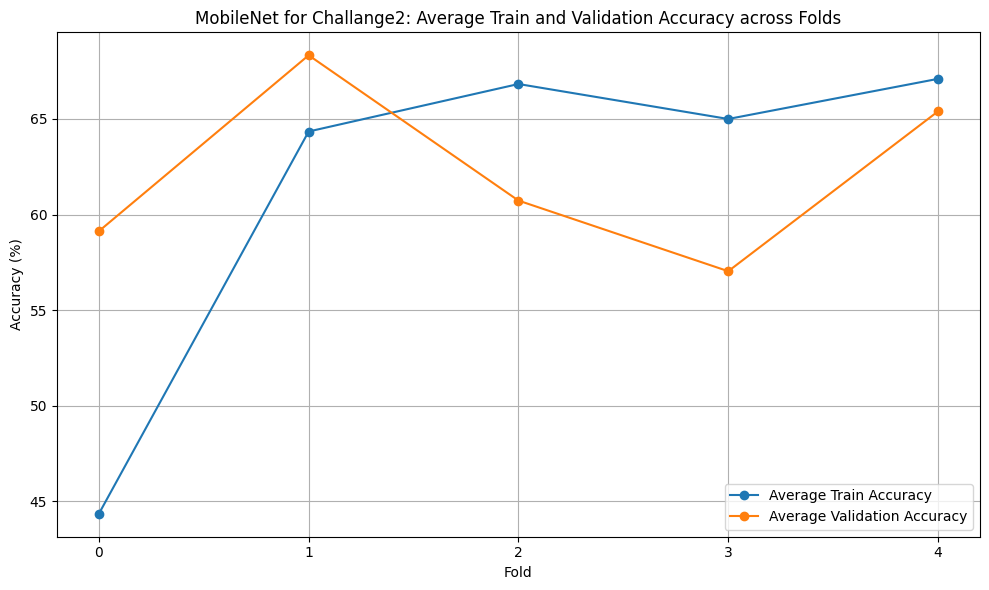

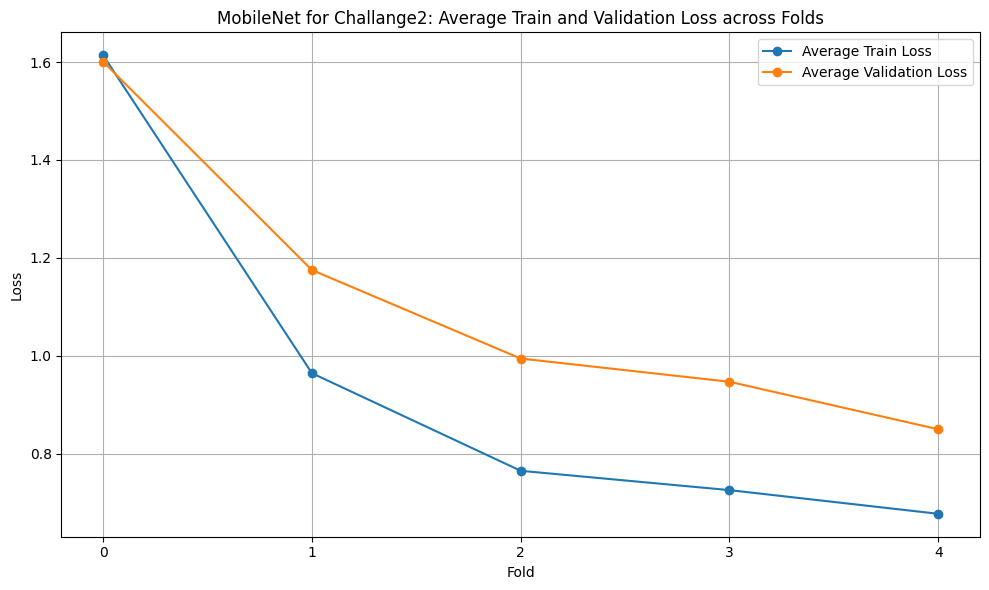

In [10]:
plot_avg_metrics(MobileNet_logs_c2,"MobileNet for Challange2")

In [11]:
ResNet18_logs="""
FOLD 0
--------------------------------
Starting epoch 1
Train Loss: 2.6767, Train Acc: 50.00%, Val Loss: 27548.7178, Val Acc: 40.00%
Starting epoch 2
Train Loss: 3.0435, Train Acc: 45.00%, Val Loss: 1532.3817, Val Acc: 40.00%
Starting epoch 3
Train Loss: 2.1125, Train Acc: 50.00%, Val Loss: 219.8216, Val Acc: 60.00%
Starting epoch 4
Train Loss: 2.0548, Train Acc: 52.50%, Val Loss: 457.2386, Val Acc: 50.00%
Starting epoch 5
Train Loss: 1.9019, Train Acc: 55.00%, Val Loss: 120.7160, Val Acc: 50.00%
Starting epoch 6
Train Loss: 2.1822, Train Acc: 57.50%, Val Loss: 27.3671, Val Acc: 40.00%
Starting epoch 7
Train Loss: 1.4998, Train Acc: 47.50%, Val Loss: 132.2333, Val Acc: 50.00%
Starting epoch 8
Train Loss: 1.4128, Train Acc: 47.50%, Val Loss: 10.2816, Val Acc: 50.00%
Starting epoch 9
Train Loss: 1.5218, Train Acc: 47.50%, Val Loss: 2.0399, Val Acc: 50.00%
Starting epoch 10
Train Loss: 1.4289, Train Acc: 52.50%, Val Loss: 3.6114, Val Acc: 50.00%
Starting epoch 11
Train Loss: 1.1345, Train Acc: 52.50%, Val Loss: 0.7972, Val Acc: 60.00%
Starting epoch 12
Train Loss: 1.0514, Train Acc: 52.50%, Val Loss: 0.8086, Val Acc: 40.00%
Starting epoch 13
Train Loss: 1.1730, Train Acc: 50.00%, Val Loss: 0.7804, Val Acc: 40.00%
Starting epoch 14
Train Loss: 1.4279, Train Acc: 50.00%, Val Loss: 0.9299, Val Acc: 40.00%
Starting epoch 15
Train Loss: 2.8295, Train Acc: 42.50%, Val Loss: 0.6714, Val Acc: 70.00%
Starting epoch 16
Train Loss: 1.0383, Train Acc: 50.00%, Val Loss: 16.2846, Val Acc: 60.00%
Starting epoch 17
Train Loss: 1.2920, Train Acc: 47.50%, Val Loss: 31.5525, Val Acc: 50.00%
Starting epoch 18
Train Loss: 0.8842, Train Acc: 70.00%, Val Loss: 6.3666, Val Acc: 50.00%
Starting epoch 19
Train Loss: 1.4790, Train Acc: 45.00%, Val Loss: 2.4892, Val Acc: 50.00%
Starting epoch 20
Train Loss: 1.2684, Train Acc: 55.00%, Val Loss: 1.3369, Val Acc: 40.00%
Starting epoch 21
Train Loss: 1.1392, Train Acc: 47.50%, Val Loss: 0.6159, Val Acc: 50.00%
Starting epoch 22
Train Loss: 1.4138, Train Acc: 47.50%, Val Loss: 0.5911, Val Acc: 50.00%
Starting epoch 23
Train Loss: 1.2230, Train Acc: 45.00%, Val Loss: 0.6139, Val Acc: 50.00%
Starting epoch 24
Train Loss: 0.8575, Train Acc: 50.00%, Val Loss: 0.6530, Val Acc: 50.00%
Starting epoch 25
Train Loss: 1.4377, Train Acc: 55.00%, Val Loss: 0.7196, Val Acc: 50.00%
Starting epoch 26
Train Loss: 1.1951, Train Acc: 60.00%, Val Loss: 0.6396, Val Acc: 50.00%
Starting epoch 27
Train Loss: 1.0485, Train Acc: 47.50%, Val Loss: 0.6465, Val Acc: 50.00%
Starting epoch 28
Train Loss: 0.9953, Train Acc: 50.00%, Val Loss: 0.6760, Val Acc: 50.00%
Starting epoch 29
Train Loss: 1.0810, Train Acc: 60.00%, Val Loss: 0.7444, Val Acc: 40.00%
Starting epoch 30
Train Loss: 1.2170, Train Acc: 57.50%, Val Loss: 1.7640, Val Acc: 50.00%
Starting epoch 31
Train Loss: 0.7667, Train Acc: 60.00%, Val Loss: 0.6610, Val Acc: 50.00%
Starting epoch 32
Train Loss: 0.9697, Train Acc: 67.50%, Val Loss: 0.6443, Val Acc: 50.00%
Starting epoch 33
Train Loss: 1.6860, Train Acc: 57.50%, Val Loss: 0.6863, Val Acc: 50.00%
Starting epoch 34
Train Loss: 1.3500, Train Acc: 45.00%, Val Loss: 0.6498, Val Acc: 50.00%
Starting epoch 35
Train Loss: 1.2843, Train Acc: 45.00%, Val Loss: 0.6474, Val Acc: 50.00%
Starting epoch 36
Train Loss: 1.4448, Train Acc: 42.50%, Val Loss: 0.7486, Val Acc: 40.00%
Starting epoch 37
Train Loss: 0.9678, Train Acc: 47.50%, Val Loss: 1.0147, Val Acc: 40.00%
Starting epoch 38
Train Loss: 1.3639, Train Acc: 42.50%, Val Loss: 1.3071, Val Acc: 50.00%
Starting epoch 39
Train Loss: 1.4975, Train Acc: 52.50%, Val Loss: 1.0672, Val Acc: 40.00%
Starting epoch 40
Train Loss: 1.3372, Train Acc: 37.50%, Val Loss: 0.7587, Val Acc: 40.00%
Starting epoch 41
Train Loss: 1.2788, Train Acc: 25.00%, Val Loss: 0.6459, Val Acc: 50.00%
Starting epoch 42
Train Loss: 0.7860, Train Acc: 60.00%, Val Loss: 0.6740, Val Acc: 50.00%
Starting epoch 43
Train Loss: 1.7042, Train Acc: 52.50%, Val Loss: 1.2363, Val Acc: 50.00%
Starting epoch 44
Train Loss: 0.8052, Train Acc: 57.50%, Val Loss: 1.2097, Val Acc: 50.00%
Starting epoch 45
Train Loss: 1.0486, Train Acc: 47.50%, Val Loss: 1.3828, Val Acc: 50.00%
Starting epoch 46
Train Loss: 1.0370, Train Acc: 55.00%, Val Loss: 1.5060, Val Acc: 50.00%
Starting epoch 47
Train Loss: 0.9156, Train Acc: 67.50%, Val Loss: 0.8611, Val Acc: 40.00%
Early stopping triggered.
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Train Loss: 1.6575, Train Acc: 47.50%, Val Loss: 0.6839, Val Acc: 60.00%
Starting epoch 2
Train Loss: 1.7488, Train Acc: 40.00%, Val Loss: 1.0563, Val Acc: 40.00%
Starting epoch 3
Train Loss: 1.3968, Train Acc: 52.50%, Val Loss: 1.0060, Val Acc: 40.00%
Starting epoch 4
Train Loss: 1.5188, Train Acc: 40.00%, Val Loss: 0.6311, Val Acc: 60.00%
Starting epoch 5
Train Loss: 0.9976, Train Acc: 57.50%, Val Loss: 0.7583, Val Acc: 40.00%
Starting epoch 6
Train Loss: 1.0888, Train Acc: 47.50%, Val Loss: 0.9796, Val Acc: 40.00%
Starting epoch 7
Train Loss: 1.5224, Train Acc: 42.50%, Val Loss: 8.0381, Val Acc: 20.00%
Starting epoch 8
Train Loss: 1.7280, Train Acc: 47.50%, Val Loss: 0.7108, Val Acc: 30.00%
Starting epoch 9
Train Loss: 1.4785, Train Acc: 50.00%, Val Loss: 0.6644, Val Acc: 40.00%
Starting epoch 10
Train Loss: 0.8992, Train Acc: 62.50%, Val Loss: 0.7106, Val Acc: 40.00%
Starting epoch 11
Train Loss: 1.3925, Train Acc: 50.00%, Val Loss: 0.7245, Val Acc: 40.00%
Starting epoch 12
Train Loss: 0.7849, Train Acc: 45.00%, Val Loss: 0.7060, Val Acc: 40.00%
Starting epoch 13
Train Loss: 1.2641, Train Acc: 52.50%, Val Loss: 0.8321, Val Acc: 30.00%
Starting epoch 14
Train Loss: 1.0085, Train Acc: 62.50%, Val Loss: 0.7565, Val Acc: 40.00%
Starting epoch 15
Train Loss: 1.2022, Train Acc: 62.50%, Val Loss: 0.8799, Val Acc: 30.00%
Starting epoch 16
Train Loss: 1.1848, Train Acc: 55.00%, Val Loss: 0.8940, Val Acc: 30.00%
Starting epoch 17
Train Loss: 1.1598, Train Acc: 47.50%, Val Loss: 0.7884, Val Acc: 30.00%
Starting epoch 18
Train Loss: 1.4113, Train Acc: 45.00%, Val Loss: 0.9553, Val Acc: 30.00%
Starting epoch 19
Train Loss: 1.2993, Train Acc: 42.50%, Val Loss: 0.8175, Val Acc: 30.00%
Starting epoch 20
Train Loss: 0.9235, Train Acc: 50.00%, Val Loss: 0.7399, Val Acc: 40.00%
Starting epoch 21
Train Loss: 0.7863, Train Acc: 70.00%, Val Loss: 0.7095, Val Acc: 40.00%
Starting epoch 22
Train Loss: 1.1240, Train Acc: 50.00%, Val Loss: 0.6926, Val Acc: 40.00%
Starting epoch 23
Train Loss: 0.7377, Train Acc: 57.50%, Val Loss: 0.6925, Val Acc: 40.00%
Starting epoch 24
Train Loss: 0.9721, Train Acc: 55.00%, Val Loss: 0.7627, Val Acc: 30.00%
Starting epoch 25
Train Loss: 0.9250, Train Acc: 45.00%, Val Loss: 0.7356, Val Acc: 40.00%
Starting epoch 26
Train Loss: 1.9048, Train Acc: 52.50%, Val Loss: 0.7135, Val Acc: 40.00%
Starting epoch 27
Train Loss: 1.5455, Train Acc: 32.50%, Val Loss: 0.7263, Val Acc: 40.00%
Starting epoch 28
Train Loss: 0.6822, Train Acc: 62.50%, Val Loss: 0.7290, Val Acc: 40.00%
Starting epoch 29
Train Loss: 1.0946, Train Acc: 50.00%, Val Loss: 0.7854, Val Acc: 30.00%
Early stopping triggered.
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Train Loss: 2.3768, Train Acc: 55.00%, Val Loss: 1.1766, Val Acc: 40.00%
Starting epoch 2
Train Loss: 1.9271, Train Acc: 57.50%, Val Loss: 13.5921, Val Acc: 40.00%
Starting epoch 3
Train Loss: 2.1946, Train Acc: 50.00%, Val Loss: 34.3752, Val Acc: 60.00%
Starting epoch 4
Train Loss: 1.0152, Train Acc: 60.00%, Val Loss: 0.8706, Val Acc: 60.00%
Starting epoch 5
Train Loss: 1.0954, Train Acc: 40.00%, Val Loss: 0.7497, Val Acc: 50.00%
Starting epoch 6
Train Loss: 1.3076, Train Acc: 50.00%, Val Loss: 0.9207, Val Acc: 50.00%
Starting epoch 7
Train Loss: 1.6080, Train Acc: 55.00%, Val Loss: 0.6820, Val Acc: 60.00%
Starting epoch 8
Train Loss: 1.1194, Train Acc: 60.00%, Val Loss: 0.7269, Val Acc: 60.00%
Starting epoch 9
Train Loss: 1.1178, Train Acc: 40.00%, Val Loss: 1.4730, Val Acc: 50.00%
Starting epoch 10
Train Loss: 1.0677, Train Acc: 50.00%, Val Loss: 1.2658, Val Acc: 40.00%
Starting epoch 11
Train Loss: 1.3377, Train Acc: 45.00%, Val Loss: 0.8585, Val Acc: 30.00%
Starting epoch 12
Train Loss: 1.1301, Train Acc: 52.50%, Val Loss: 0.7866, Val Acc: 40.00%
Starting epoch 13
Train Loss: 0.8387, Train Acc: 52.50%, Val Loss: 0.8523, Val Acc: 60.00%
Starting epoch 14
Train Loss: 0.8804, Train Acc: 65.00%, Val Loss: 0.8766, Val Acc: 60.00%
Starting epoch 15
Train Loss: 0.5458, Train Acc: 65.00%, Val Loss: 0.8825, Val Acc: 60.00%
Starting epoch 16
Train Loss: 0.9657, Train Acc: 60.00%, Val Loss: 0.9029, Val Acc: 60.00%
Starting epoch 17
Train Loss: 0.8944, Train Acc: 52.50%, Val Loss: 0.8817, Val Acc: 70.00%
Starting epoch 18
Train Loss: 0.8414, Train Acc: 62.50%, Val Loss: 0.9433, Val Acc: 70.00%
Starting epoch 19
Train Loss: 0.8484, Train Acc: 60.00%, Val Loss: 0.9134, Val Acc: 60.00%
Starting epoch 20
Train Loss: 0.6420, Train Acc: 62.50%, Val Loss: 0.8672, Val Acc: 70.00%
Starting epoch 21
Train Loss: 0.8105, Train Acc: 60.00%, Val Loss: 0.8954, Val Acc: 70.00%
Starting epoch 22
Train Loss: 1.3402, Train Acc: 52.50%, Val Loss: 0.8862, Val Acc: 70.00%
Starting epoch 23
Train Loss: 0.8070, Train Acc: 60.00%, Val Loss: 0.9777, Val Acc: 60.00%
Starting epoch 24
Train Loss: 0.9118, Train Acc: 50.00%, Val Loss: 0.9836, Val Acc: 60.00%
Starting epoch 25
Train Loss: 0.8874, Train Acc: 47.50%, Val Loss: 0.9561, Val Acc: 70.00%
Starting epoch 26
Train Loss: 0.8984, Train Acc: 50.00%, Val Loss: 0.9304, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.9985, Train Acc: 55.00%, Val Loss: 0.9223, Val Acc: 60.00%
Starting epoch 28
Train Loss: 0.7429, Train Acc: 67.50%, Val Loss: 0.8984, Val Acc: 60.00%
Starting epoch 29
Train Loss: 0.6120, Train Acc: 65.00%, Val Loss: 0.9363, Val Acc: 60.00%
Starting epoch 30
Train Loss: 0.7899, Train Acc: 62.50%, Val Loss: 0.8985, Val Acc: 60.00%
Starting epoch 31
Train Loss: 1.3273, Train Acc: 42.50%, Val Loss: 0.9128, Val Acc: 60.00%
Starting epoch 32
Train Loss: 0.8932, Train Acc: 52.50%, Val Loss: 0.9429, Val Acc: 60.00%
Early stopping triggered.
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Train Loss: 2.1156, Train Acc: 52.50%, Val Loss: 0.8950, Val Acc: 40.00%
Starting epoch 2
Train Loss: 1.8837, Train Acc: 42.50%, Val Loss: 10.1386, Val Acc: 40.00%
Starting epoch 3
Train Loss: 1.4154, Train Acc: 42.50%, Val Loss: 1.6655, Val Acc: 40.00%
Starting epoch 4
Train Loss: 1.0259, Train Acc: 47.50%, Val Loss: 5.4155, Val Acc: 40.00%
Starting epoch 5
Train Loss: 1.2573, Train Acc: 42.50%, Val Loss: 1.9654, Val Acc: 30.00%
Starting epoch 6
Train Loss: 0.8478, Train Acc: 55.00%, Val Loss: 0.6725, Val Acc: 60.00%
Starting epoch 7
Train Loss: 0.6536, Train Acc: 70.00%, Val Loss: 0.5816, Val Acc: 70.00%
Starting epoch 8
Train Loss: 0.9004, Train Acc: 57.50%, Val Loss: 0.6433, Val Acc: 70.00%
Starting epoch 9
Train Loss: 0.9848, Train Acc: 45.00%, Val Loss: 0.6778, Val Acc: 50.00%
Starting epoch 10
Train Loss: 1.0019, Train Acc: 50.00%, Val Loss: 0.6448, Val Acc: 60.00%
Starting epoch 11
Train Loss: 0.9000, Train Acc: 55.00%, Val Loss: 0.5904, Val Acc: 70.00%
Starting epoch 12
Train Loss: 0.6965, Train Acc: 65.00%, Val Loss: 0.5750, Val Acc: 60.00%
Starting epoch 13
Train Loss: 0.8309, Train Acc: 60.00%, Val Loss: 0.5987, Val Acc: 60.00%
Starting epoch 14
Train Loss: 0.8154, Train Acc: 57.50%, Val Loss: 0.5677, Val Acc: 80.00%
Starting epoch 15
Train Loss: 0.9973, Train Acc: 55.00%, Val Loss: 0.5799, Val Acc: 80.00%
Starting epoch 16
Train Loss: 0.8647, Train Acc: 55.00%, Val Loss: 0.5527, Val Acc: 80.00%
Starting epoch 17
Train Loss: 0.7999, Train Acc: 65.00%, Val Loss: 0.5745, Val Acc: 70.00%
Starting epoch 18
Train Loss: 1.0956, Train Acc: 42.50%, Val Loss: 0.5794, Val Acc: 70.00%
Starting epoch 19
Train Loss: 0.5357, Train Acc: 75.00%, Val Loss: 0.5795, Val Acc: 70.00%
Starting epoch 20
Train Loss: 0.8011, Train Acc: 55.00%, Val Loss: 0.5702, Val Acc: 70.00%
Starting epoch 21
Train Loss: 0.6198, Train Acc: 77.50%, Val Loss: 0.5829, Val Acc: 70.00%
Starting epoch 22
Train Loss: 0.6367, Train Acc: 70.00%, Val Loss: 0.5613, Val Acc: 70.00%
Starting epoch 23
Train Loss: 0.6954, Train Acc: 67.50%, Val Loss: 0.5871, Val Acc: 70.00%
Starting epoch 24
Train Loss: 0.6045, Train Acc: 62.50%, Val Loss: 0.5963, Val Acc: 70.00%
Starting epoch 25
Train Loss: 0.9070, Train Acc: 60.00%, Val Loss: 0.5800, Val Acc: 70.00%
Starting epoch 26
Train Loss: 0.9268, Train Acc: 62.50%, Val Loss: 0.5840, Val Acc: 70.00%
Starting epoch 27
Train Loss: 0.8887, Train Acc: 62.50%, Val Loss: 0.5634, Val Acc: 70.00%
Starting epoch 28
Train Loss: 0.5011, Train Acc: 75.00%, Val Loss: 0.5649, Val Acc: 70.00%
Starting epoch 29
Train Loss: 0.6862, Train Acc: 75.00%, Val Loss: 0.5753, Val Acc: 70.00%
Starting epoch 30
Train Loss: 0.7974, Train Acc: 60.00%, Val Loss: 0.5797, Val Acc: 70.00%
Starting epoch 31
Train Loss: 0.6246, Train Acc: 72.50%, Val Loss: 0.5745, Val Acc: 70.00%
Starting epoch 32
Train Loss: 0.8021, Train Acc: 70.00%, Val Loss: 0.5946, Val Acc: 70.00%
Starting epoch 33
Train Loss: 0.6014, Train Acc: 77.50%, Val Loss: 0.5771, Val Acc: 70.00%
Starting epoch 34
Train Loss: 0.8222, Train Acc: 65.00%, Val Loss: 0.5642, Val Acc: 70.00%
Starting epoch 35
Train Loss: 0.5842, Train Acc: 70.00%, Val Loss: 0.5987, Val Acc: 70.00%
Starting epoch 36
Train Loss: 0.7180, Train Acc: 77.50%, Val Loss: 0.5844, Val Acc: 70.00%
Starting epoch 37
Train Loss: 0.7047, Train Acc: 62.50%, Val Loss: 0.5757, Val Acc: 70.00%
Starting epoch 38
Train Loss: 0.7673, Train Acc: 70.00%, Val Loss: 0.5467, Val Acc: 70.00%
Starting epoch 39
Train Loss: 0.9175, Train Acc: 60.00%, Val Loss: 0.5306, Val Acc: 70.00%
Starting epoch 40
Train Loss: 0.8435, Train Acc: 52.50%, Val Loss: 0.5520, Val Acc: 70.00%
Starting epoch 41
Train Loss: 0.8766, Train Acc: 52.50%, Val Loss: 0.5910, Val Acc: 70.00%
Starting epoch 42
Train Loss: 0.8198, Train Acc: 62.50%, Val Loss: 0.5886, Val Acc: 70.00%
Starting epoch 43
Train Loss: 0.5673, Train Acc: 72.50%, Val Loss: 0.5902, Val Acc: 70.00%
Starting epoch 44
Train Loss: 1.0287, Train Acc: 57.50%, Val Loss: 0.5668, Val Acc: 70.00%
Starting epoch 45
Train Loss: 0.9323, Train Acc: 55.00%, Val Loss: 0.5426, Val Acc: 70.00%
Starting epoch 46
Train Loss: 0.6049, Train Acc: 75.00%, Val Loss: 0.5315, Val Acc: 80.00%
Starting epoch 47
Train Loss: 0.6692, Train Acc: 60.00%, Val Loss: 0.5703, Val Acc: 70.00%
Starting epoch 48
Train Loss: 0.8683, Train Acc: 60.00%, Val Loss: 0.5905, Val Acc: 70.00%
Starting epoch 49
Train Loss: 1.1318, Train Acc: 50.00%, Val Loss: 0.5874, Val Acc: 70.00%
Starting epoch 50
Train Loss: 0.7363, Train Acc: 60.00%, Val Loss: 0.5787, Val Acc: 70.00%
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Train Loss: 1.2921, Train Acc: 55.00%, Val Loss: 0.9202, Val Acc: 60.00%
Starting epoch 2
Train Loss: 2.0557, Train Acc: 42.50%, Val Loss: 13.9871, Val Acc: 40.00%
Starting epoch 3
Train Loss: 1.1681, Train Acc: 42.50%, Val Loss: 0.7847, Val Acc: 70.00%
Starting epoch 4
Train Loss: 1.0919, Train Acc: 55.00%, Val Loss: 32.0109, Val Acc: 40.00%
Starting epoch 5
Train Loss: 0.8694, Train Acc: 47.50%, Val Loss: 0.8347, Val Acc: 60.00%
Starting epoch 6
Train Loss: 1.0484, Train Acc: 47.50%, Val Loss: 0.7564, Val Acc: 50.00%
Starting epoch 7
Train Loss: 0.7683, Train Acc: 65.00%, Val Loss: 0.8556, Val Acc: 40.00%
Starting epoch 8
Train Loss: 1.0011, Train Acc: 52.50%, Val Loss: 0.8192, Val Acc: 60.00%
Starting epoch 9
Train Loss: 1.0540, Train Acc: 55.00%, Val Loss: 0.9839, Val Acc: 50.00%
Starting epoch 10
Train Loss: 1.0995, Train Acc: 45.00%, Val Loss: 0.9070, Val Acc: 40.00%
Starting epoch 11
Train Loss: 1.0005, Train Acc: 45.00%, Val Loss: 0.6545, Val Acc: 70.00%
Starting epoch 12
Train Loss: 0.9866, Train Acc: 52.50%, Val Loss: 0.5987, Val Acc: 70.00%
Starting epoch 13
Train Loss: 0.8326, Train Acc: 67.50%, Val Loss: 0.5651, Val Acc: 70.00%
Starting epoch 14
Train Loss: 0.6252, Train Acc: 72.50%, Val Loss: 0.6007, Val Acc: 60.00%
Starting epoch 15
Train Loss: 0.7818, Train Acc: 62.50%, Val Loss: 0.6703, Val Acc: 60.00%
Starting epoch 16
Train Loss: 0.7661, Train Acc: 67.50%, Val Loss: 0.7235, Val Acc: 60.00%
Starting epoch 17
Train Loss: 0.6876, Train Acc: 50.00%, Val Loss: 0.7183, Val Acc: 60.00%
Starting epoch 18
Train Loss: 1.0210, Train Acc: 47.50%, Val Loss: 0.7176, Val Acc: 60.00%
Starting epoch 19
Train Loss: 0.9604, Train Acc: 52.50%, Val Loss: 0.6976, Val Acc: 60.00%
Starting epoch 20
Train Loss: 0.6397, Train Acc: 62.50%, Val Loss: 0.7144, Val Acc: 50.00%
Starting epoch 21
Train Loss: 0.7315, Train Acc: 52.50%, Val Loss: 0.7267, Val Acc: 40.00%
Starting epoch 22
Train Loss: 1.0770, Train Acc: 55.00%, Val Loss: 0.7263, Val Acc: 40.00%
Starting epoch 23
Train Loss: 0.7330, Train Acc: 62.50%, Val Loss: 0.7067, Val Acc: 60.00%
Starting epoch 24
Train Loss: 0.6859, Train Acc: 65.00%, Val Loss: 0.7104, Val Acc: 40.00%
Starting epoch 25
Train Loss: 0.9140, Train Acc: 60.00%, Val Loss: 0.7036, Val Acc: 40.00%
Starting epoch 26
Train Loss: 0.8558, Train Acc: 52.50%, Val Loss: 0.6797, Val Acc: 50.00%
Starting epoch 27
Train Loss: 0.9204, Train Acc: 47.50%, Val Loss: 0.6779, Val Acc: 40.00%
Starting epoch 28
Train Loss: 0.8195, Train Acc: 47.50%, Val Loss: 0.6957, Val Acc: 60.00%
Starting epoch 29
Train Loss: 0.7240, Train Acc: 65.00%, Val Loss: 0.6940, Val Acc: 60.00%
Starting epoch 30
Train Loss: 0.7689, Train Acc: 60.00%, Val Loss: 0.6925, Val Acc: 60.00%
Starting epoch 31
Train Loss: 0.7044, Train Acc: 65.00%, Val Loss: 0.7027, Val Acc: 50.00%
Starting epoch 32
Train Loss: 0.7311, Train Acc: 62.50%, Val Loss: 0.7153, Val Acc: 40.00%
Starting epoch 33
Train Loss: 0.7718, Train Acc: 57.50%, Val Loss: 0.6886, Val Acc: 40.00%
Starting epoch 34
Train Loss: 0.8423, Train Acc: 60.00%, Val Loss: 0.7131, Val Acc: 40.00%
Starting epoch 35
Train Loss: 0.8281, Train Acc: 52.50%, Val Loss: 0.6771, Val Acc: 40.00%
Starting epoch 36
Train Loss: 0.6918, Train Acc: 57.50%, Val Loss: 0.6973, Val Acc: 50.00%
Starting epoch 37
Train Loss: 1.0583, Train Acc: 52.50%, Val Loss: 0.7166, Val Acc: 40.00%
Starting epoch 38
Train Loss: 0.9469, Train Acc: 45.00%, Val Loss: 0.7245, Val Acc: 50.00%
Early stopping triggered.
"""

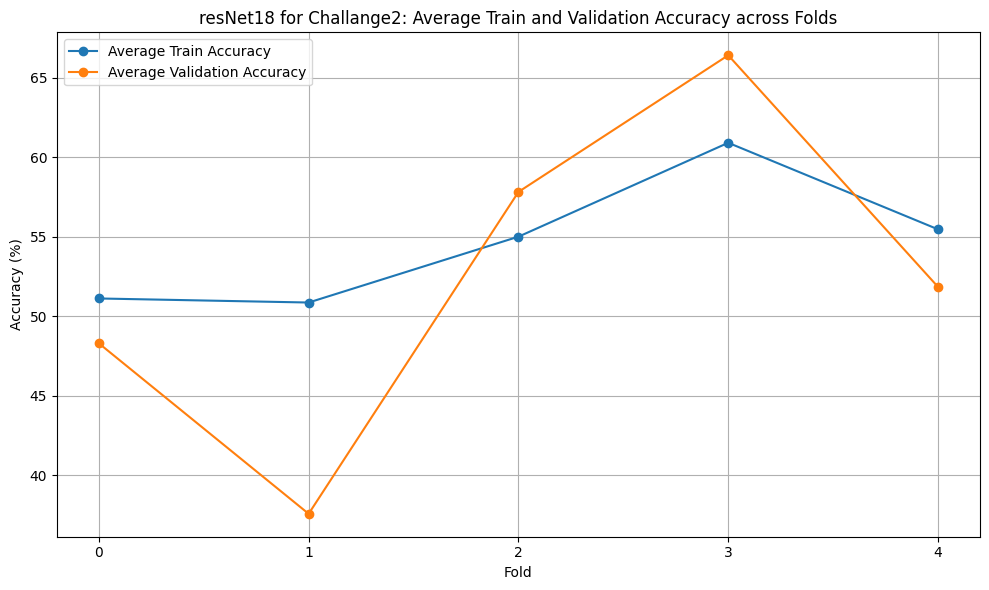

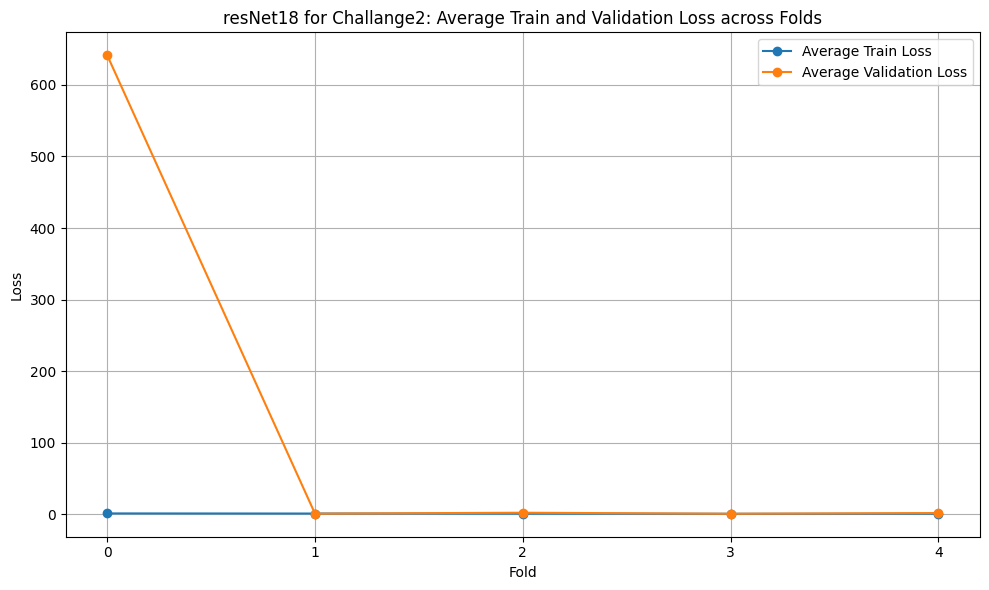

In [12]:
plot_avg_metrics(ResNet18_logs,"resNet18 for Challange2")

In [13]:
vit_logs_c2="""
FOLD 0
--------------------------------
Starting epoch 1
Train Loss: 1.6557, Train Acc: 45.00%, Val Loss: 0.6546, Val Acc: 100.00%
Starting epoch 2
Train Loss: 0.4343, Train Acc: 95.00%, Val Loss: 0.2905, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.1765, Train Acc: 100.00%, Val Loss: 0.1595, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.1135, Train Acc: 100.00%, Val Loss: 0.0880, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.0756, Train Acc: 100.00%, Val Loss: 0.0503, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0230, Train Acc: 100.00%, Val Loss: 0.0366, Val Acc: 100.00%
Starting epoch 7
Train Loss: 0.0188, Train Acc: 100.00%, Val Loss: 0.0290, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.0170, Train Acc: 100.00%, Val Loss: 0.0235, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0135, Train Acc: 100.00%, Val Loss: 0.0195, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.0110, Train Acc: 100.00%, Val Loss: 0.0162, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.0108, Train Acc: 100.00%, Val Loss: 0.0149, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0077, Train Acc: 100.00%, Val Loss: 0.0141, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0077, Train Acc: 100.00%, Val Loss: 0.0134, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0085, Train Acc: 100.00%, Val Loss: 0.0128, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0073, Train Acc: 100.00%, Val Loss: 0.0121, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0070, Train Acc: 100.00%, Val Loss: 0.0115, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0064, Train Acc: 100.00%, Val Loss: 0.0111, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0062, Train Acc: 100.00%, Val Loss: 0.0106, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0059, Train Acc: 100.00%, Val Loss: 0.0101, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0060, Train Acc: 100.00%, Val Loss: 0.0097, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0054, Train Acc: 100.00%, Val Loss: 0.0095, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0057, Train Acc: 100.00%, Val Loss: 0.0093, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0060, Train Acc: 100.00%, Val Loss: 0.0091, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0052, Train Acc: 100.00%, Val Loss: 0.0088, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0048, Train Acc: 100.00%, Val Loss: 0.0085, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0057, Train Acc: 100.00%, Val Loss: 0.0083, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0042, Train Acc: 100.00%, Val Loss: 0.0081, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0040, Train Acc: 100.00%, Val Loss: 0.0080, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0050, Train Acc: 100.00%, Val Loss: 0.0078, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0048, Train Acc: 100.00%, Val Loss: 0.0076, Val Acc: 100.00%
Starting epoch 31
Train Loss: 0.0045, Train Acc: 100.00%, Val Loss: 0.0076, Val Acc: 100.00%
Starting epoch 32
Train Loss: 0.0037, Train Acc: 100.00%, Val Loss: 0.0075, Val Acc: 100.00%
Starting epoch 33
Train Loss: 0.0038, Train Acc: 100.00%, Val Loss: 0.0074, Val Acc: 100.00%
Starting epoch 34
Train Loss: 0.0043, Train Acc: 100.00%, Val Loss: 0.0074, Val Acc: 100.00%
Starting epoch 35
Train Loss: 0.0038, Train Acc: 100.00%, Val Loss: 0.0073, Val Acc: 100.00%
Starting epoch 36
Train Loss: 0.0051, Train Acc: 100.00%, Val Loss: 0.0072, Val Acc: 100.00%
Starting epoch 37
Train Loss: 0.0043, Train Acc: 100.00%, Val Loss: 0.0072, Val Acc: 100.00%
Starting epoch 38
Train Loss: 0.0041, Train Acc: 100.00%, Val Loss: 0.0071, Val Acc: 100.00%
Starting epoch 39
Train Loss: 0.0036, Train Acc: 100.00%, Val Loss: 0.0070, Val Acc: 100.00%
Starting epoch 40
Train Loss: 0.0036, Train Acc: 100.00%, Val Loss: 0.0070, Val Acc: 100.00%
Starting epoch 41
Train Loss: 0.0037, Train Acc: 100.00%, Val Loss: 0.0069, Val Acc: 100.00%
Starting epoch 42
Train Loss: 0.0038, Train Acc: 100.00%, Val Loss: 0.0069, Val Acc: 100.00%
Starting epoch 43
Train Loss: 0.0032, Train Acc: 100.00%, Val Loss: 0.0068, Val Acc: 100.00%
Starting epoch 44
Train Loss: 0.0036, Train Acc: 100.00%, Val Loss: 0.0068, Val Acc: 100.00%
Starting epoch 45
Train Loss: 0.0037, Train Acc: 100.00%, Val Loss: 0.0068, Val Acc: 100.00%
Starting epoch 46
Train Loss: 0.0040, Train Acc: 100.00%, Val Loss: 0.0067, Val Acc: 100.00%
Starting epoch 47
Train Loss: 0.0039, Train Acc: 100.00%, Val Loss: 0.0067, Val Acc: 100.00%
Starting epoch 48
Train Loss: 0.0031, Train Acc: 100.00%, Val Loss: 0.0067, Val Acc: 100.00%
Starting epoch 49
Train Loss: 0.0041, Train Acc: 100.00%, Val Loss: 0.0066, Val Acc: 100.00%
Starting epoch 50
Train Loss: 0.0029, Train Acc: 100.00%, Val Loss: 0.0066, Val Acc: 100.00%
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Train Loss: 0.0024, Train Acc: 100.00%, Val Loss: 0.0019, Val Acc: 100.00%
Starting epoch 2
Train Loss: 0.0010, Train Acc: 100.00%, Val Loss: 0.0010, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.0005, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.0003, Train Acc: 100.00%, Val Loss: 0.0003, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 7
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 31
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 32
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 33
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 34
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 35
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 36
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 37
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 38
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 39
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 40
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 41
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 42
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 43
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 44
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 45
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 46
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 47
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 48
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 49
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 50
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 2
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0003, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 7
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 31
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 32
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 33
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 34
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 35
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 36
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 37
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 38
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 39
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 40
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 41
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 42
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 43
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 44
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 45
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 46
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 47
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 48
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 49
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 50
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 2
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 7
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 1.1989, Val Acc: 90.00%
Starting epoch 8
Train Loss: 0.0869, Train Acc: 95.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0002, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.0024, Train Acc: 100.00%, Val Loss: 0.0007, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.0010, Train Acc: 100.00%, Val Loss: 0.0007, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0009, Train Acc: 100.00%, Val Loss: 0.0007, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0032, Train Acc: 100.00%, Val Loss: 0.0006, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0007, Train Acc: 100.00%, Val Loss: 0.0006, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0005, Train Acc: 100.00%, Val Loss: 0.0006, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0013, Train Acc: 100.00%, Val Loss: 0.0006, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0004, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0003, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0004, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0004, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0005, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0004, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0003, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0004, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0003, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0003, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0004, Train Acc: 100.00%, Val Loss: 0.0004, Val Acc: 100.00%
Early stopping triggered.
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Train Loss: 0.0001, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 2
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0003, Val Acc: 100.00%
Starting epoch 3
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 4
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 5
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 6
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 7
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 8
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 9
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 10
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 11
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 12
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 13
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 14
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 15
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 16
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 17
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 18
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 19
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 20
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 21
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 22
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 23
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0000, Val Acc: 100.00%
Starting epoch 24
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 25
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 26
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0001, Val Acc: 100.00%
Starting epoch 27
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0002, Val Acc: 100.00%
Starting epoch 28
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0003, Val Acc: 100.00%
Starting epoch 29
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0003, Val Acc: 100.00%
Starting epoch 30
Train Loss: 0.0000, Train Acc: 100.00%, Val Loss: 0.0003, Val Acc: 100.00%
Early stopping triggered.
"""

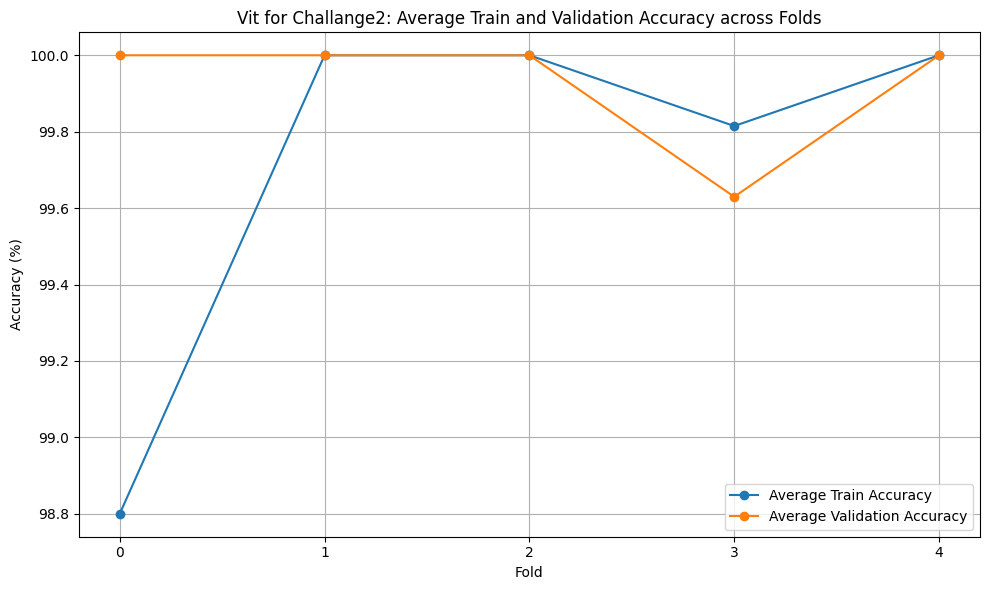

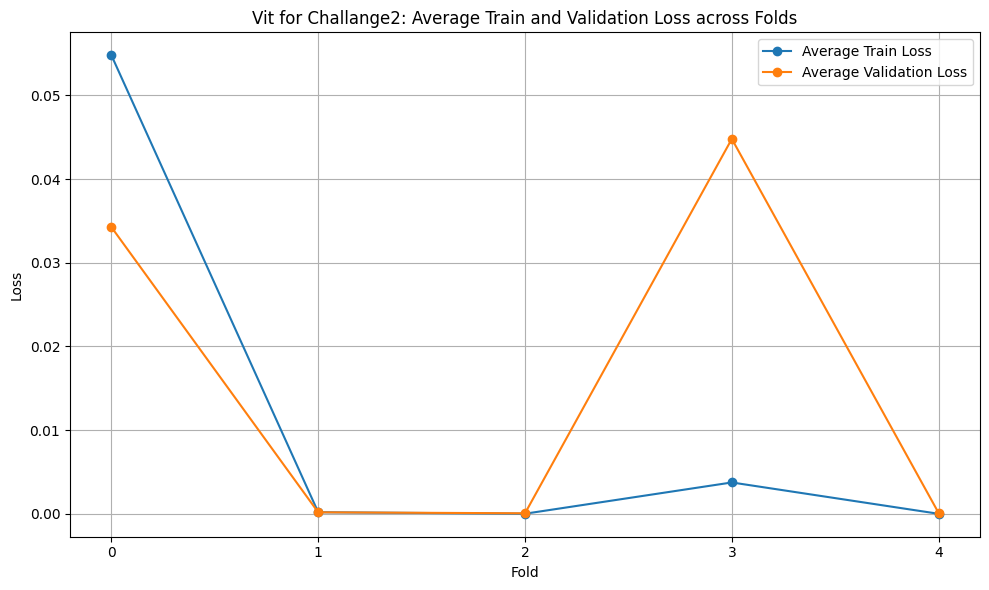

In [14]:
plot_avg_metrics(vit_logs_c2,"Vit for Challange2")